In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import warnings
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [2]:
df_WHO_clean_data = pd.read_csv('Dataset/Life Expectancy Clean Data.csv', delimiter=',')

In [3]:
df_WHO_clean_data.describe()
df_WHO_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1987 non-null   int64  
 1   Country                              1987 non-null   object 
 2   Year                                 1987 non-null   int64  
 3   Status                               1987 non-null   object 
 4   Life_Expectancy                      1987 non-null   float64
 5   Adult_Mortality                      1987 non-null   float64
 6   Infant_Deaths                        1987 non-null   int64  
 7   Alcohol                              1987 non-null   float64
 8   Percentage_Exp                       1987 non-null   float64
 9   HepatitisB                           1987 non-null   float64
 10  Measles                              1987 non-null   int64  
 11  BMI                           

In [4]:
df_WHO_clean_data.describe()

,Unnamed: 0,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,1415.366381,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,...,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,833.398098,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,...,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,...,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,665.000000,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,1447.000000,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2061.500000,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2937.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,...,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000


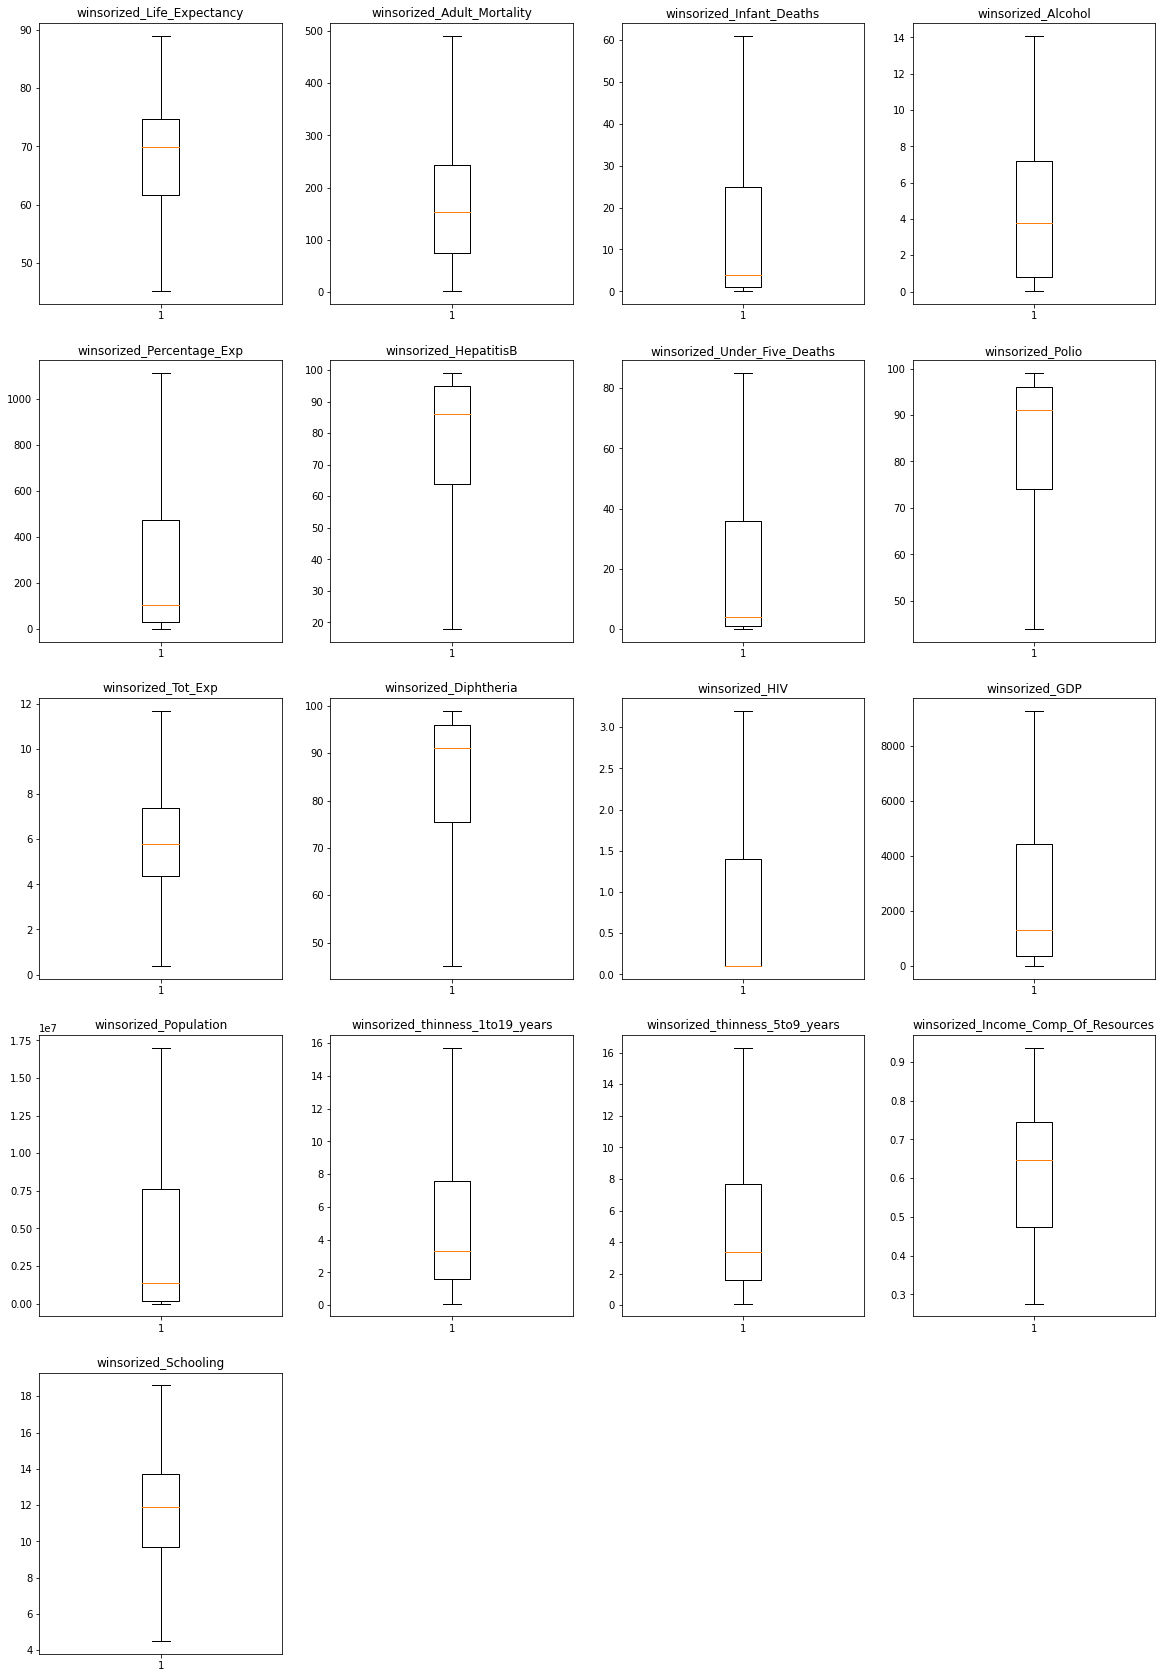

In [5]:
# Tạo từ điển cho các cột
col_dict_clean_data = {'winsorized_Life_Expectancy':1,'winsorized_Adult_Mortality':2,
'winsorized_Infant_Deaths':3,'winsorized_Alcohol':4,
'winsorized_Percentage_Exp':5,'winsorized_HepatitisB':6,
'winsorized_Under_Five_Deaths':7,'winsorized_Polio':8,
'winsorized_Tot_Exp':9,'winsorized_Diphtheria':10,'winsorized_HIV':11,
'winsorized_GDP':12,'winsorized_Population':13,'winsorized_thinness_1to19_years':14,'winsorized_thinness_5to9_years':15,
'winsorized_Income_Comp_Of_Resources':16,'winsorized_Schooling':17}

# Phát hiện các outlier bằng cách dùng box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict_clean_data.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df_WHO_clean_data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

# Nhóm các nước (pt-đang pt)

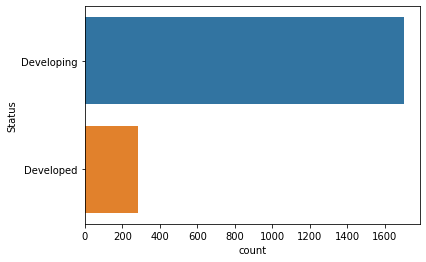

In [6]:
for column in df_WHO_clean_data.select_dtypes(include='object'):
    if df_WHO_clean_data[column].nunique() < 10:
        sns.countplot(y=column, data=df_WHO_clean_data)
        plt.show()

In [7]:
for column in df_WHO_clean_data.select_dtypes(include='object'):
    if df_WHO_clean_data[column].nunique() < 10:
        display(df_WHO_clean_data.groupby(column).mean())

,Unnamed: 0,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
Status,,,,,,,,,,,,,,,,,,,,,
Developed,1313.894737,2007.000000,78.831579,83.094737,0.782456,10.372737,2842.875579,81.533333,415.298246,52.891228,...,94.343860,7.140175,94.477193,0.100000,6570.832997,4.512557e+06,1.377895,1.394035,0.839730,15.540702
Developing,1432.357814,2006.982374,66.164982,190.608108,42.625147,3.464827,324.238364,72.576968,3117.085194,33.671974,...,81.051116,5.687045,81.341951,1.003702,2244.130881,4.847862e+06,5.554642,5.631845,0.578703,11.008519


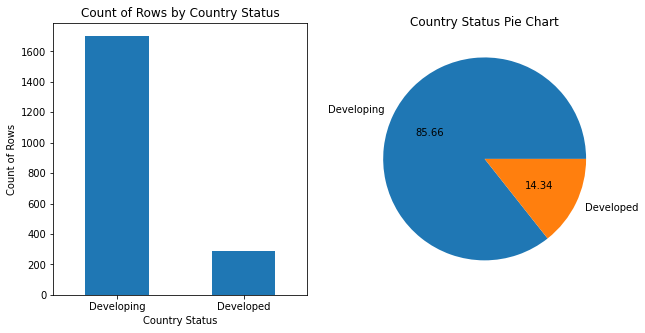

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
df_WHO_clean_data.Status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
df_WHO_clean_data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

# Top 10 quốc gia có tuổi thọ cao nhất

In [9]:
Life_Expectancy_point = df_WHO_clean_data[['Country', 'Status','winsorized_Life_Expectancy']]
# 'winsorized_Adult_Mortality', 'winsorized_Infant_Deaths',
# 'winsorized_Alcohol','winsorized_Percentage_Exp','winsorized_HepatitisB',
# 'winsorized_Under_Five_Deaths','winsorized_Polio','winsorized_Tot_Exp','winsorized_Diphtheria',
# 'winsorized_HIV','winsorized_GDP','winsorized_Population','winsorized_thinness_1to19_years'
# ,'winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources','winsorized_Schooling']]

In [10]:
Life_Expectancy_point  = Life_Expectancy_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [11]:
Life_Expectancy_point['row_number'] = Life_Expectancy_point.groupby('Country').cumcount()+1
Life_Expectancy_point_top = Life_Expectancy_point[Life_Expectancy_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Life_Expectancy') 

In [12]:
Life_Expectancy_point_top = Life_Expectancy_point[Life_Expectancy_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Life_Expectancy')

In [13]:
Life_Expectancy_point_top

,Country,Status,winsorized_Life_Expectancy
167,Belgium,Developed,89.0
689,Germany,Developed,89.0
1484,Portugal,Developed,89.0
719,Greece,Developing,88.0
407,Chile,Developing,83.0
497,Cyprus,Developed,83.0
92,Australia,Developed,82.7
1664,Spain,Developed,82.6
899,Italy,Developed,82.5
1724,Sweden,Developed,82.3


Text(0.5, 1.0, 'Top 10 quốc gia có tuổi thọ cao nhất')

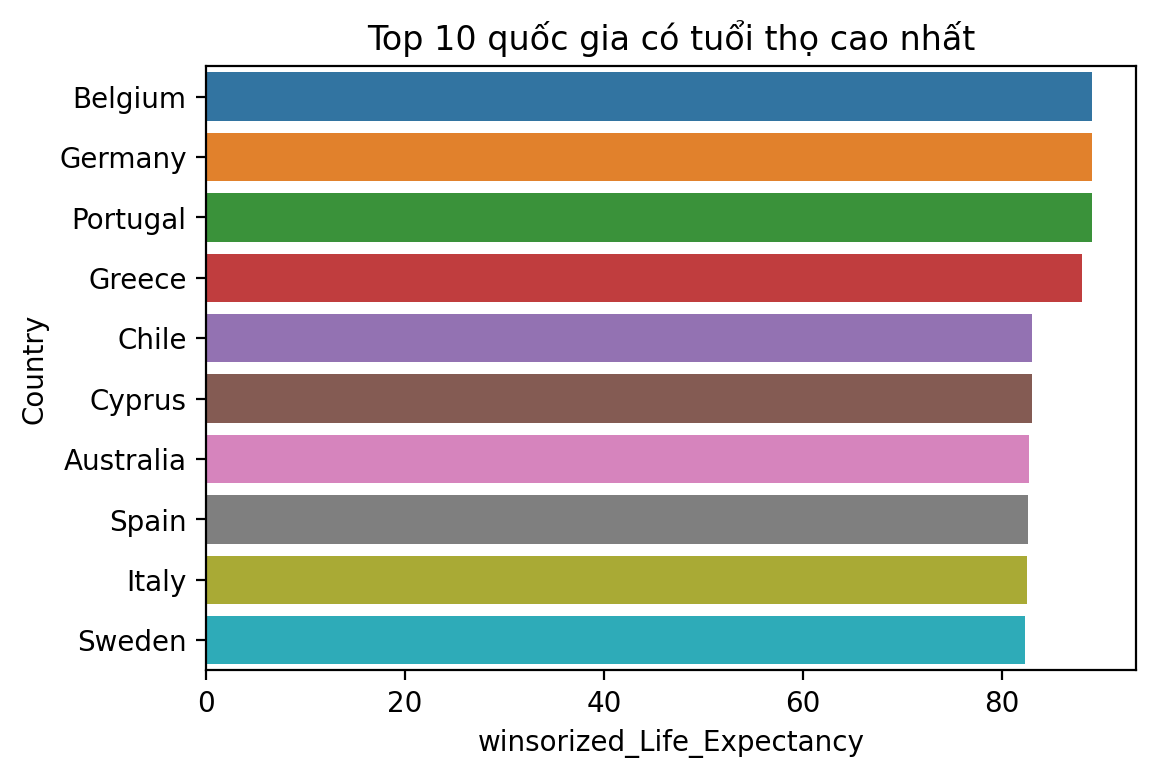

In [14]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Life_Expectancy_point_top.head(10),y='Country',x='winsorized_Life_Expectancy')
plt.title("Top 10 quốc gia có tuổi thọ cao nhất")

# Top 10 quốc gia có lượng người tử vong lớn

In [15]:
Adult_Mortality_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Adult_Mortality']]

In [16]:
Adult_Mortality_point  = Adult_Mortality_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [17]:
Adult_Mortality_point['row_number'] = Adult_Mortality_point.groupby('Country').cumcount()+1
Adult_Mortality_point_top = Adult_Mortality_point[Adult_Mortality_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Adult_Mortality') 

In [18]:
Adult_Mortality_point_top = Adult_Mortality_point[Adult_Mortality_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Adult_Mortality')

In [19]:
Adult_Mortality_point_top

,Country,Status,winsorized_Adult_Mortality
1019,Lesotho,Developing,491.0
1619,Sierra Leone,Developing,463.0
377,Central African Republic,Developing,437.0
1709,Swaziland,Developing,382.0
1094,Malawi,Developing,377.0
1259,Mozambique,Developing,375.0
1972,Zimbabwe,Developing,371.0
347,Cameroon,Developing,366.0
392,Chad,Developing,362.0
1364,Nigeria,Developing,362.0


Text(0.5, 1.0, 'Top 10 quốc gia có lượng người trưởng thành tử vong lớn')

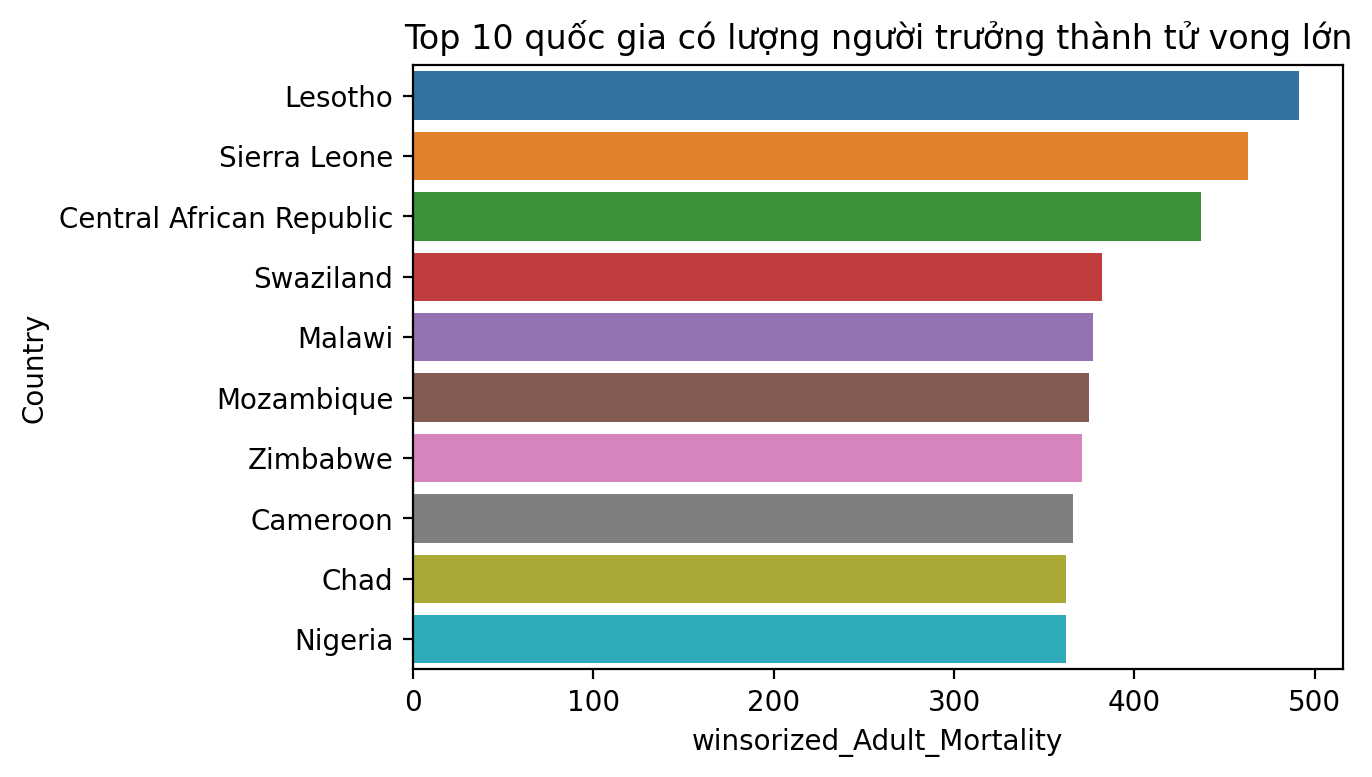

In [20]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Adult_Mortality_point_top.head(10),y='Country',x='winsorized_Adult_Mortality')
plt.title("Top 10 quốc gia có lượng người trưởng thành tử vong lớn")

# Top 10 quốc gia có lượng trẻ tử vong lớn nhất

In [21]:
Infant_Deaths_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Infant_Deaths']]

In [22]:
Infant_Deaths_point  = Infant_Deaths_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [23]:
Infant_Deaths_point['row_number'] = Infant_Deaths_point.groupby('Country').cumcount()+1
Infant_Deaths_point_top = Infant_Deaths_point[Infant_Deaths_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Infant_Deaths') 

In [24]:
Infant_Deaths_point_top = Infant_Deaths_point[Infant_Deaths_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Infant_Deaths') 

In [25]:
Infant_Deaths_point_top

,Country,Status,winsorized_Infant_Deaths
0,Afghanistan,Developing,61
47,Angola,Developing,61
137,Bangladesh,Developing,61
422,China,Developing,61
614,Ethiopia,Developing,61
824,India,Developing,61
839,Indonesia,Developing,61
1259,Mozambique,Developing,61
1364,Nigeria,Developing,61
1379,Pakistan,Developing,61


Text(0.5, 1.0, 'Top 10 quốc gia có lượng trẻ tử vong lớn')

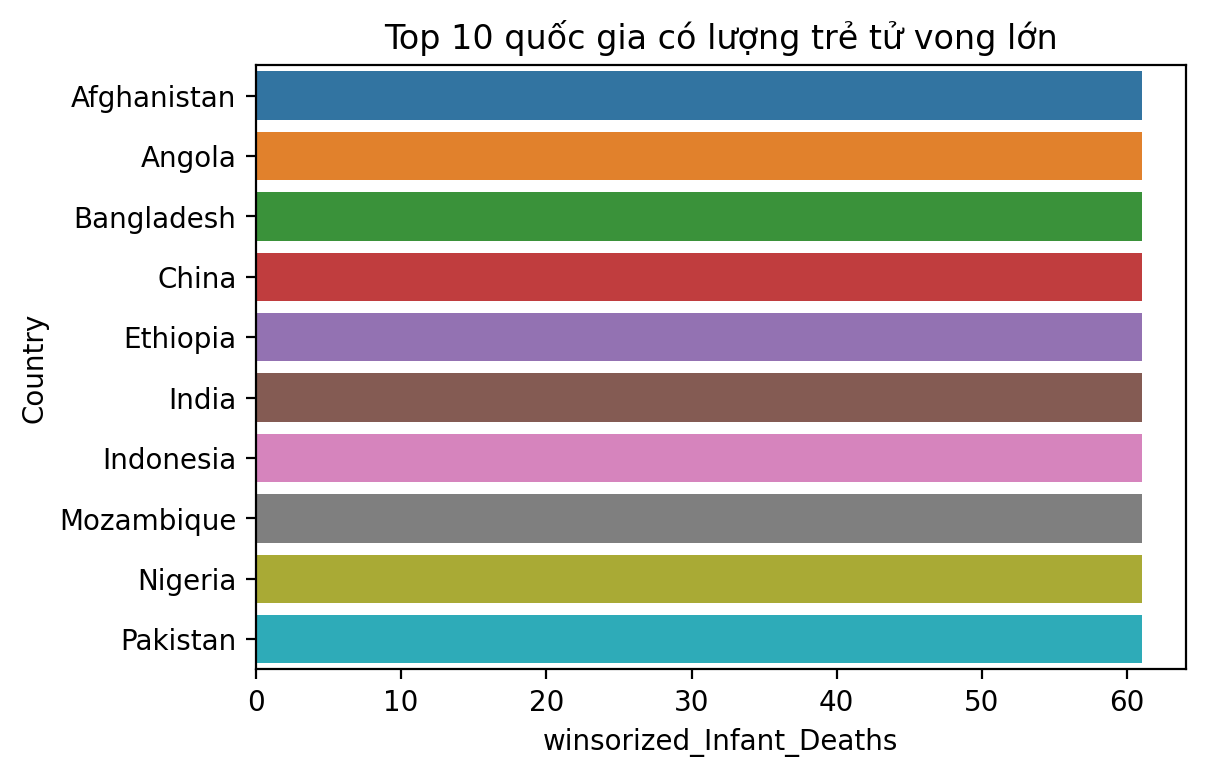

In [26]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Infant_Deaths_point_top.head(10),y='Country',x='winsorized_Infant_Deaths')
plt.title("Top 10 quốc gia có lượng trẻ tử vong lớn")

# Top 10 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất

In [27]:
Alcohol_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Alcohol']]

In [28]:
Alcohol_point  = Alcohol_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [29]:
Alcohol_point['row_number'] = Alcohol_point.groupby('Country').cumcount()+1
Alcohol_point_top = Alcohol_point[Alcohol_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Alcohol') 

In [30]:
Alcohol_point_top = Alcohol_point[Alcohol_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Alcohol') 

In [31]:
Alcohol_point_top

,Country,Status,winsorized_Alcohol
1049,Lithuania,Developed,14.09
152,Belarus,Developing,13.94
167,Belgium,Developed,12.60
107,Austria,Developed,12.32
482,Croatia,Developed,12.14
272,Bulgaria,Developed,12.03
644,France,Developing,11.50
1064,Luxembourg,Developed,11.12
689,Germany,Developed,11.03
869,Ireland,Developed,10.75


Text(0.5, 1.0, 'Top 10 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất')

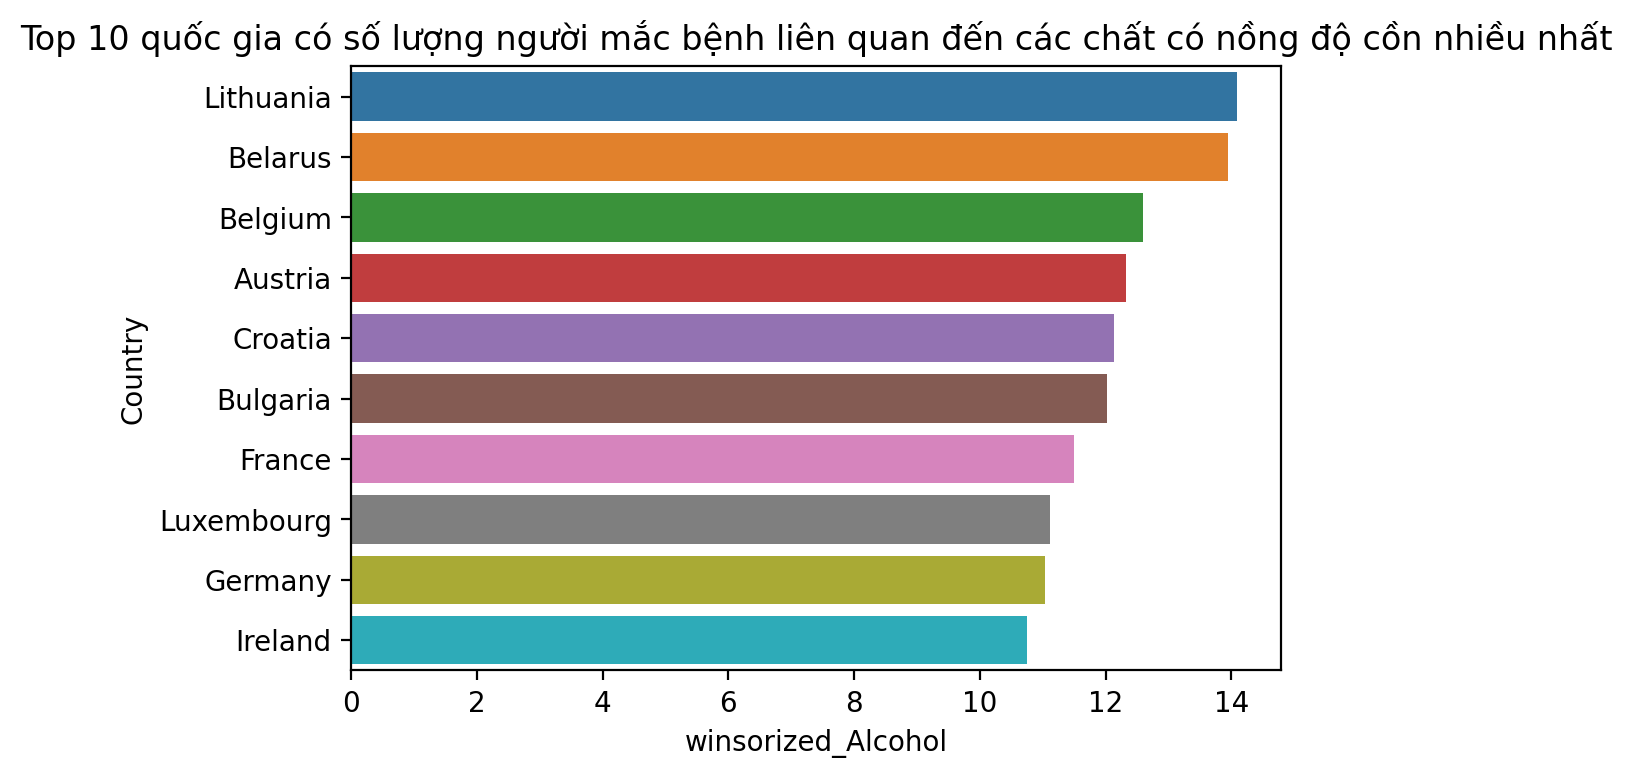

In [32]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Alcohol_point_top.head(10),y='Country',x='winsorized_Alcohol')
plt.title("Top 10 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất")

# Top 10 quốc gia có Phần trăm kinh nghiệm nhiều nhất

In [33]:
Percentage_Exp_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Percentage_Exp']]

In [34]:
Percentage_Exp_point  = Percentage_Exp_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [35]:
Percentage_Exp_point['row_number'] = Percentage_Exp_point.groupby('Country').cumcount()+1
Percentage_Exp_point_top = Percentage_Exp_point[Percentage_Exp_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Percentage_Exp') 

In [36]:
Percentage_Exp_point_top = Percentage_Exp_point[Percentage_Exp_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Percentage_Exp') 

In [37]:
Percentage_Exp_point_top

,Country,Status,winsorized_Percentage_Exp
92,Australia,Developed,1111.191325
107,Austria,Developed,1111.191325
152,Belarus,Developing,1111.191325
167,Belgium,Developed,1111.191325
407,Chile,Developing,1111.191325
437,Colombia,Developing,1111.191325
482,Croatia,Developed,1111.191325
599,Estonia,Developing,1111.191325
644,France,Developing,1111.191325
719,Greece,Developing,1111.191325


Text(0.5, 1.0, 'Top 10 quốc gia có Phần trăm kinh nghiệm nhiều nhất')

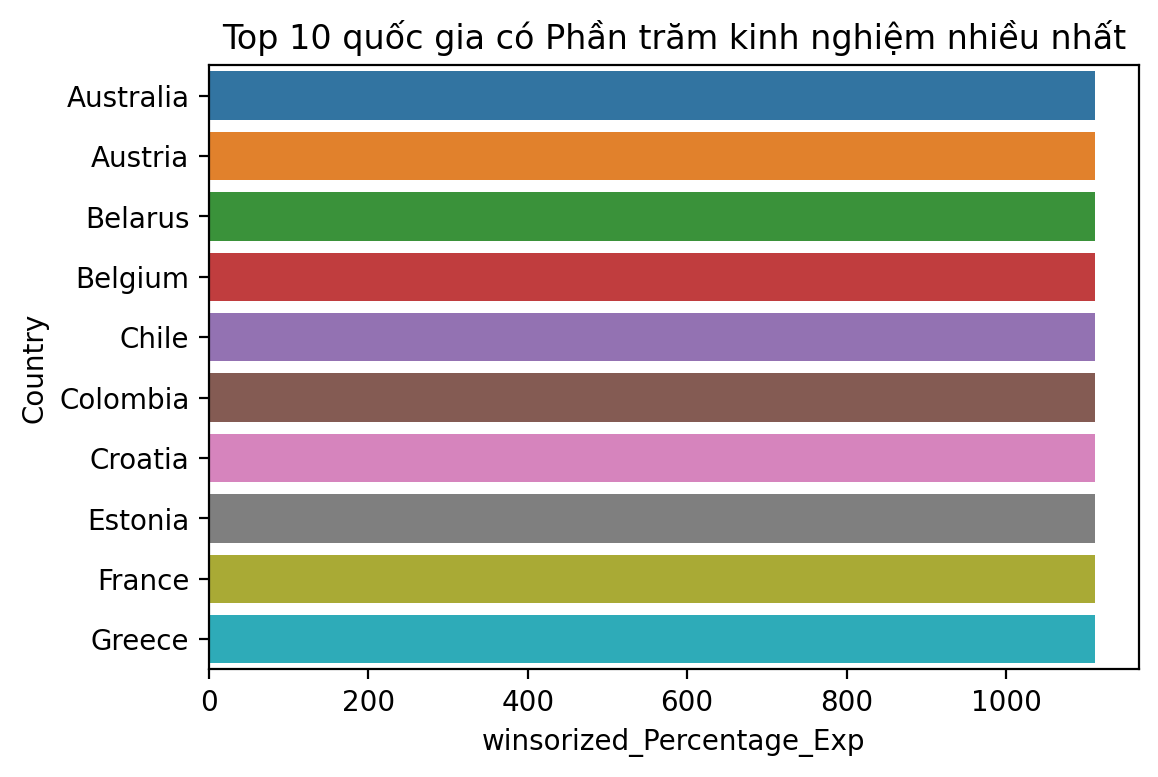

In [38]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Percentage_Exp_point_top.head(10),y='Country',x='winsorized_Percentage_Exp')
plt.title("Top 10 quốc gia có Phần trăm kinh nghiệm nhiều nhất")

# Top 10 quốc gia có số người mắc bệnh viêm gan B nhiều nhất

In [39]:
HepatitisB_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_HepatitisB']]

In [40]:
HepatitisB_point  = HepatitisB_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [41]:
HepatitisB_point['row_number'] = HepatitisB_point.groupby('Country').cumcount()+1
HepatitisB_point_top = HepatitisB_point[HepatitisB_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_HepatitisB') 

In [42]:
HepatitisB_point_top = HepatitisB_point[HepatitisB_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_HepatitisB') 

In [43]:
HepatitisB_point_top

,Country,Status,winsorized_HepatitisB
16,Albania,Developing,99.0
212,Bhutan,Developing,99.0
422,China,Developing,99.0
629,Fiji,Developing,99.0
1124,Maldives,Developing,99.0
1214,Mongolia,Developing,99.0
1244,Morocco,Developing,99.0
1604,Seychelles,Developing,99.0
1679,Sri Lanka,Developing,99.0
1762,Thailand,Developing,99.0


Text(0.5, 1.0, 'Top 10 quốc gia có số người mắc bệnh viêm gan B nhiều nhất')

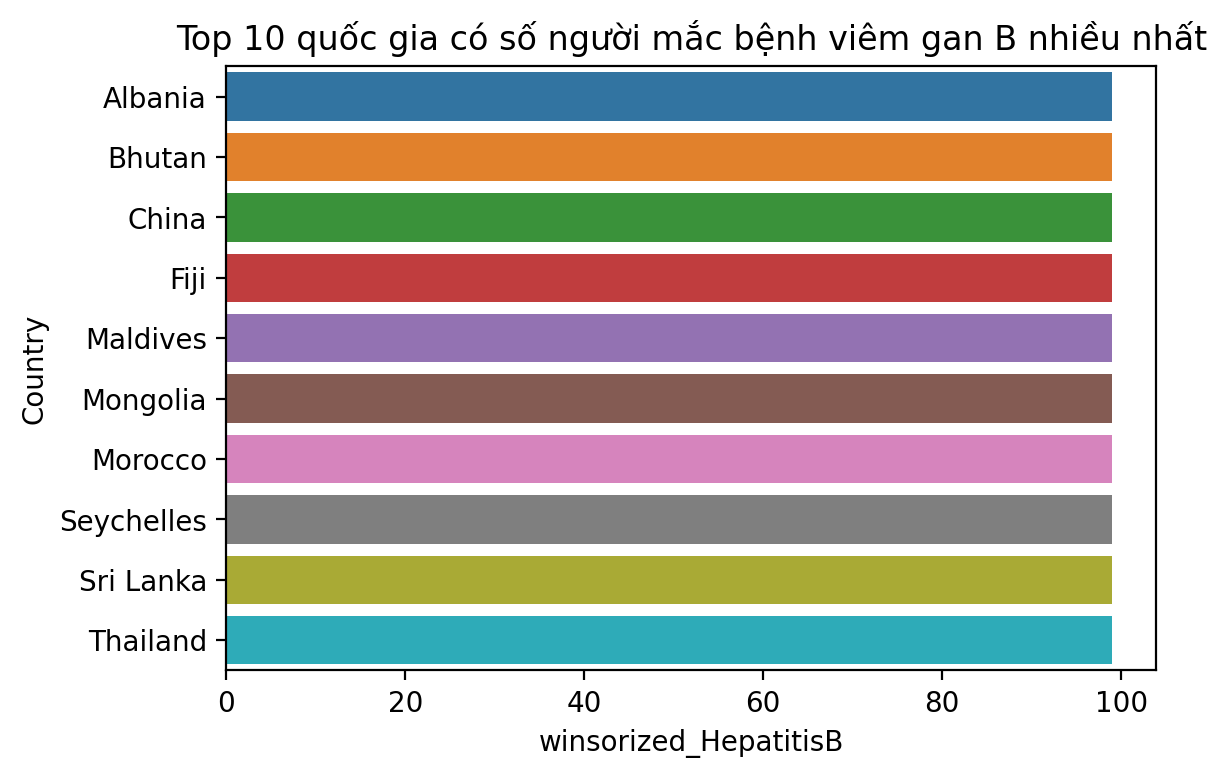

In [44]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=HepatitisB_point_top.head(10),y='Country',x='winsorized_HepatitisB')
plt.title("Top 10 quốc gia có số người mắc bệnh viêm gan B nhiều nhất")

# Top 10 quốc gia có dưới 5 người chết nhiều nhất

In [45]:
Under_Five_Deaths_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Under_Five_Deaths']]

In [46]:
Under_Five_Deaths_point  = Under_Five_Deaths_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [47]:
Under_Five_Deaths_point['row_number'] = Under_Five_Deaths_point.groupby('Country').cumcount()+1
Under_Five_Deaths_point_top = Under_Five_Deaths_point[Under_Five_Deaths_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Under_Five_Deaths') 

In [48]:
Under_Five_Deaths_point_top = Under_Five_Deaths_point[Under_Five_Deaths_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Under_Five_Deaths') 

In [49]:
Under_Five_Deaths_point_top

,Country,Status,winsorized_Under_Five_Deaths
47,Angola,Developing,85
137,Bangladesh,Developing,85
422,China,Developing,85
614,Ethiopia,Developing,85
824,India,Developing,85
839,Indonesia,Developing,85
1139,Mali,Developing,85
1349,Niger,Developing,85
1364,Nigeria,Developing,85
1379,Pakistan,Developing,85


Text(0.5, 1.0, 'Top 10 quốc gia có dưới 5 người chết nhiều nhất')

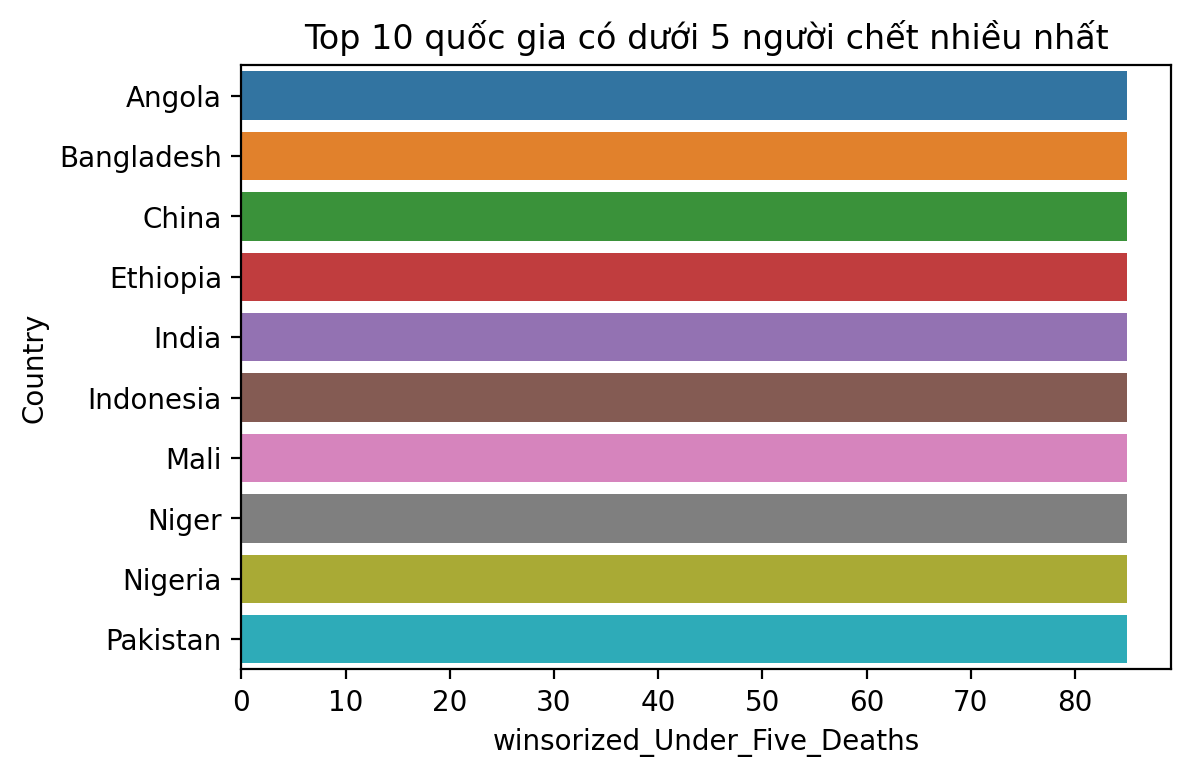

In [50]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Under_Five_Deaths_point_top.head(10),y='Country',x='winsorized_Under_Five_Deaths')
plt.title("Top 10 quốc gia có dưới 5 người chết nhiều nhất")

# Top 10 quốc gia có số người mắc bệnh bại liệt nhiều nhất

In [51]:
Polio_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Polio']]

In [52]:
Polio_point  = Polio_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [53]:
Polio_point['row_number'] = Polio_point.groupby('Country').cumcount()+1
Polio_point_top = Polio_point[Polio_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Polio') 

In [54]:
Polio_point_top = Polio_point[Polio_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Polio') 

In [55]:
Polio_point_top

,Country,Status,winsorized_Polio
16,Albania,Developing,99.0
167,Belgium,Developed,99.0
422,China,Developing,99.0
497,Cyprus,Developed,99.0
629,Fiji,Developing,99.0
719,Greece,Developing,99.0
1064,Luxembourg,Developed,99.0
1124,Maldives,Developing,99.0
1154,Malta,Developed,99.0
1214,Mongolia,Developing,99.0


Text(0.5, 1.0, 'Top 10 quốc gia có số người mắc bệnh bại liệt nhiều nhất')

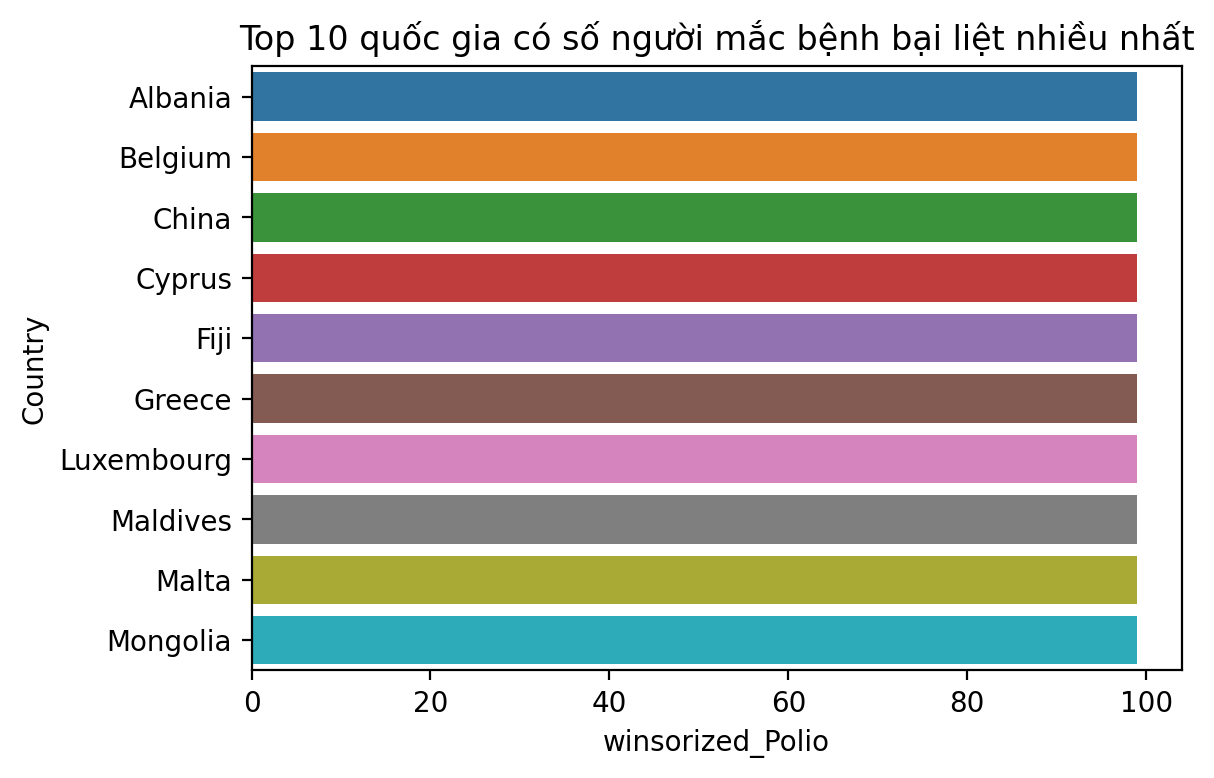

In [56]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Polio_point_top.head(10),y='Country',x='winsorized_Polio')
plt.title("Top 10 quốc gia có số người mắc bệnh bại liệt nhiều nhất")

# Top 10 quốc gia có tổng điểm kinh nghiệm nhiều nhất

In [57]:
Tot_Exp_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Tot_Exp']]

In [58]:
Tot_Exp_point  = Tot_Exp_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [59]:
Tot_Exp_point['row_number'] = Tot_Exp_point.groupby('Country').cumcount()+1
Tot_Exp_point_top = Tot_Exp_point[Tot_Exp_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Tot_Exp') 

In [60]:
Tot_Exp_point_top = Tot_Exp_point[Tot_Exp_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Tot_Exp') 

In [61]:
Tot_Exp_point_top

,Country,Status,winsorized_Tot_Exp
1124,Maldives,Developing,11.70
1619,Sierra Leone,Developing,11.70
1724,Sweden,Developed,11.70
644,France,Developing,11.54
1094,Malawi,Developing,11.38
689,Germany,Developed,11.30
107,Austria,Developed,11.21
1424,Paraguay,Developing,9.81
1154,Malta,Developed,9.75
227,Bosnia and Herzegovina,Developing,9.57


Text(0.5, 1.0, 'Top 10 quốc gia có tổng điểm kinh nghiệm nhiều nhất')

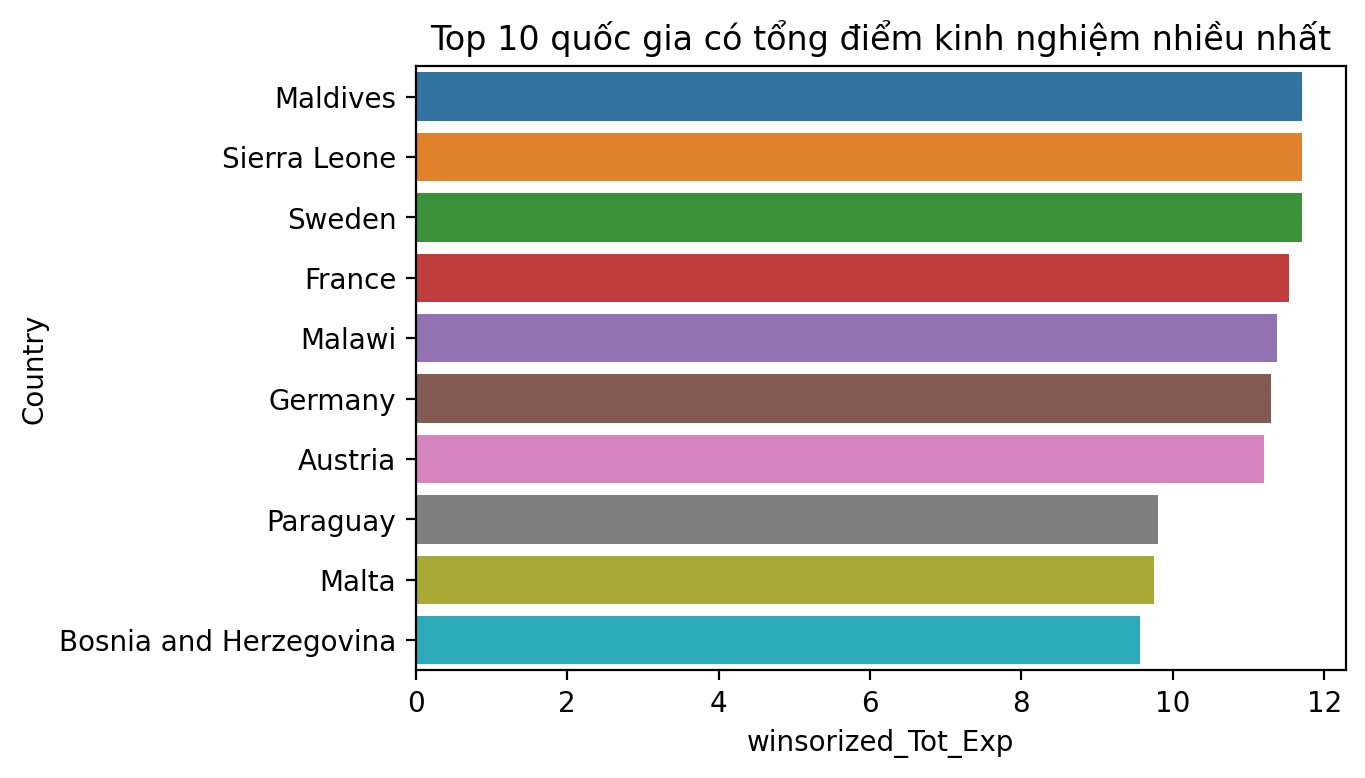

In [62]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Tot_Exp_point_top.head(10),y='Country',x='winsorized_Tot_Exp')
plt.title("Top 10 quốc gia có tổng điểm kinh nghiệm nhiều nhất")

# Top 10 quốc gia có số người mắc bệnh bạch hầu nhiều nhất

In [63]:
Diphtheria_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Diphtheria']]

In [64]:
Diphtheria_point  = Diphtheria_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [65]:
Diphtheria_point['row_number'] = Diphtheria_point.groupby('Country').cumcount()+1
Diphtheria_point_top = Diphtheria_point[Diphtheria_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Diphtheria') 

In [66]:
Diphtheria_point_top = Diphtheria_point[Diphtheria_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Diphtheria') 

In [67]:
Diphtheria_point_top

,Country,Status,winsorized_Diphtheria
16,Albania,Developing,99.0
167,Belgium,Developed,99.0
212,Bhutan,Developing,99.0
422,China,Developing,99.0
497,Cyprus,Developed,99.0
629,Fiji,Developing,99.0
719,Greece,Developing,99.0
1064,Luxembourg,Developed,99.0
1124,Maldives,Developing,99.0
1154,Malta,Developed,99.0


Text(0.5, 1.0, 'Top 10 quốc gia có số người mắc bệnh bạch hầu nhiều nhất')

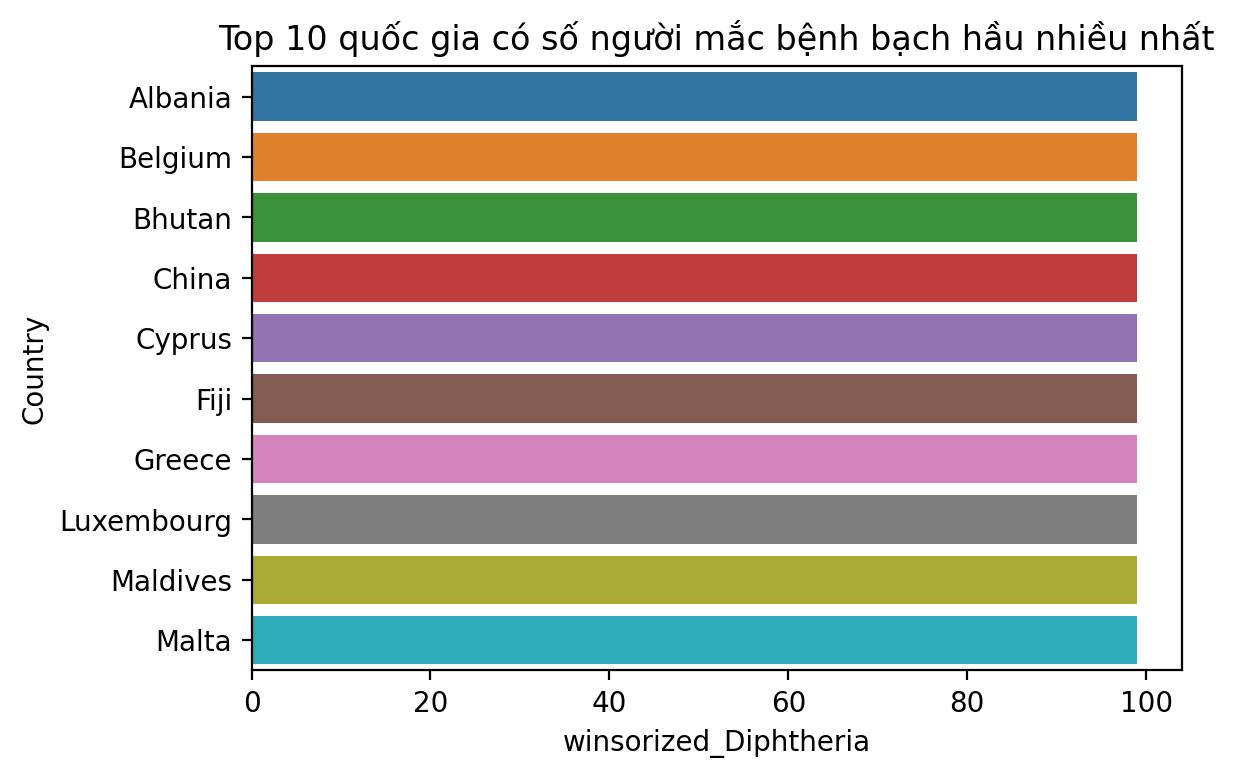

In [68]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Diphtheria_point_top.head(10),y='Country',x='winsorized_Diphtheria')
plt.title("Top 10 quốc gia có số người mắc bệnh bạch hầu nhiều nhất")

# Top 10 quốc gia có số lượng người bị mắc HIV nhiều nhất

In [69]:
HIV_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_HIV']]

In [70]:
HIV_point  = HIV_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [71]:
HIV_point['row_number'] = HIV_point.groupby('Country').cumcount()+1
HIV_point_top = HIV_point[HIV_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_HIV') 

In [72]:
HIV_point_top = HIV_point[HIV_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_HIV') 

In [73]:
HIV_point_top

,Country,Status,winsorized_HIV
347,Cameroon,Developing,3.2
377,Central African Republic,Developing,3.2
572,Equatorial Guinea,Developing,3.2
764,Guinea-Bissau,Developing,3.2
1019,Lesotho,Developing,3.2
1094,Malawi,Developing,3.2
1259,Mozambique,Developing,3.2
1364,Nigeria,Developing,3.2
1649,South Africa,Developing,3.2
1709,Swaziland,Developing,3.2


Text(0.5, 1.0, 'Top 10 quốc gia có số người mắc bệnh HIV nhiều nhất')

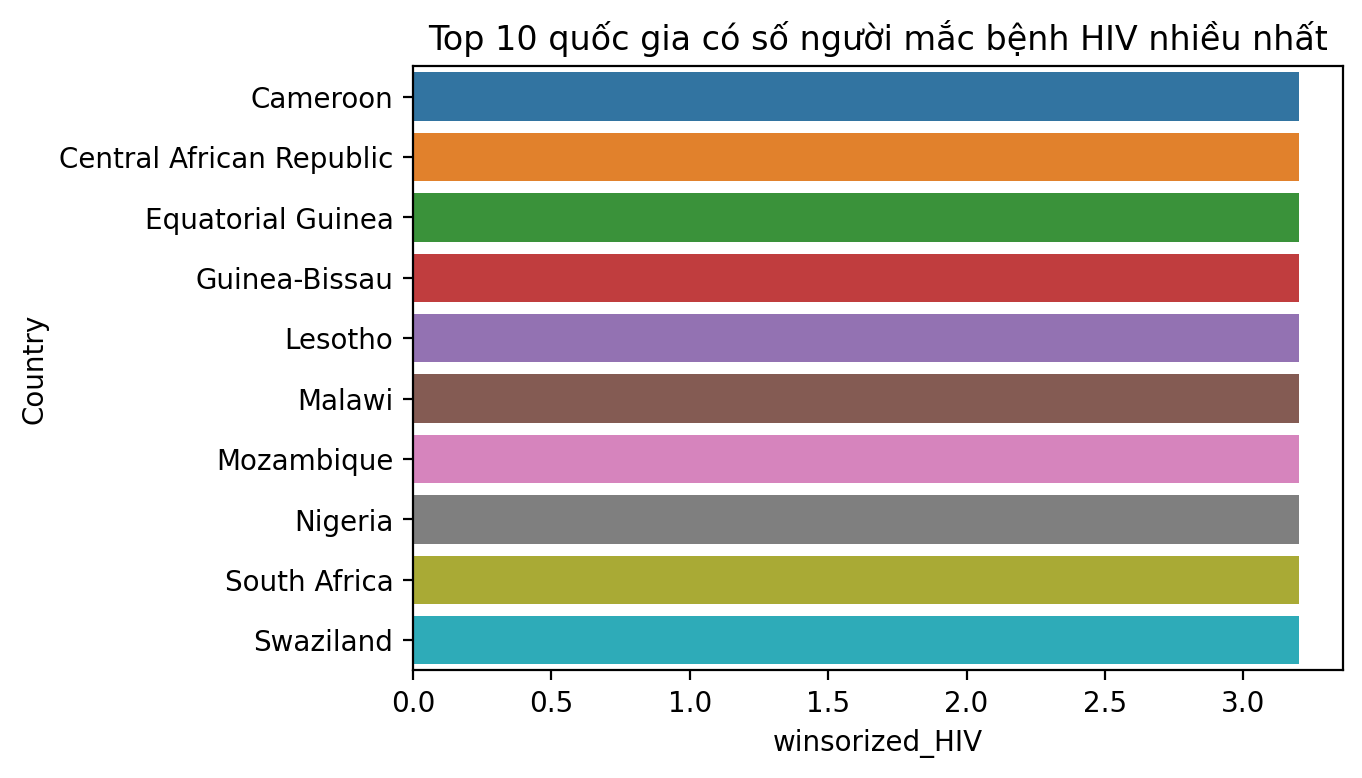

In [74]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=HIV_point_top.head(10),y='Country',x='winsorized_HIV')
plt.title("Top 10 quốc gia có số người mắc bệnh HIV nhiều nhất")

# Top 10 quốc gia có GDP cao nhất thế giới

In [75]:
GDP_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_GDP']]

In [76]:
GDP_point  = GDP_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [77]:
GDP_point['row_number'] = GDP_point.groupby('Country').cumcount()+1
GDP_point_top = GDP_point[GDP_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_GDP') 

In [78]:
GDP_point_top = GDP_point[GDP_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_GDP') 

In [79]:
GDP_point_top

,Country,Status,winsorized_GDP
62,Argentina,Developing,9291.227619
92,Australia,Developed,9291.227619
107,Austria,Developed,9291.227619
167,Belgium,Developed,9291.227619
407,Chile,Developing,9291.227619
482,Croatia,Developed,9291.227619
599,Estonia,Developing,9291.227619
644,France,Developing,9291.227619
659,Gabon,Developing,9291.227619
719,Greece,Developing,9291.227619


Text(0.5, 1.0, 'Top 10 quốc gia có GDP cao nhất thế giới theo dữ liệu bệnh tật của WHO')

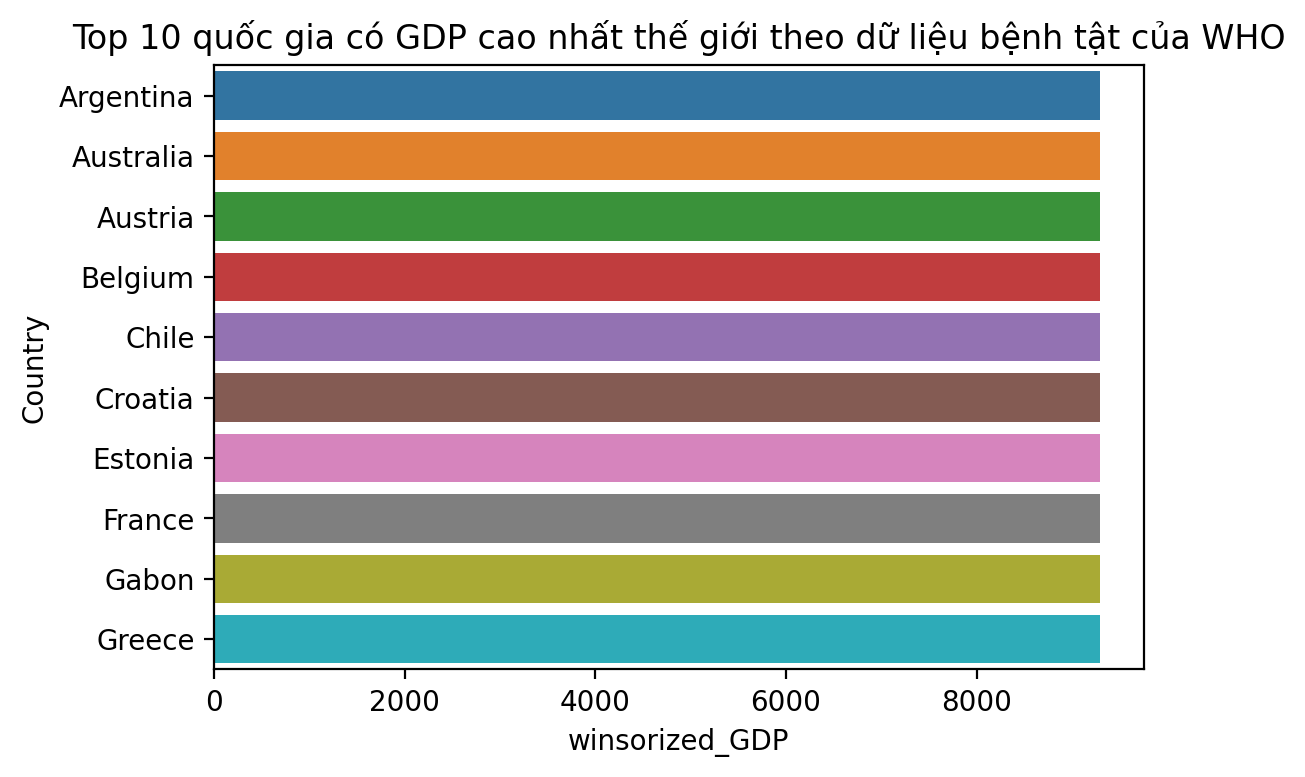

In [80]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=GDP_point_top.head(10),y='Country',x='winsorized_GDP')
plt.title("Top 10 quốc gia có GDP cao nhất thế giới theo dữ liệu bệnh tật của WHO")

# Top 10 quốc gia có dân số cao nhất thế giới

In [81]:
Population_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Population']]

In [82]:
Population_point  = Population_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [83]:
Population_point['row_number'] = Population_point.groupby('Country').cumcount()+1
Population_point_top = Population_point[Population_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Population') 

In [84]:
Population_point_top = Population_point[Population_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Population') 

In [85]:
Population_point_top

,Country,Status,winsorized_Population
0,Afghanistan,Developing,16993354.0
32,Algeria,Developing,16993354.0
62,Argentina,Developing,16993354.0
257,Brazil,Developing,16993354.0
287,Burkina Faso,Developing,16993354.0
362,Canada,Developing,16993354.0
407,Chile,Developing,16993354.0
437,Colombia,Developing,16993354.0
614,Ethiopia,Developing,16993354.0
644,France,Developing,16993354.0


Text(0.5, 1.0, 'Top 10 quốc gia có dân số cao trên thế giới theo dữ liệu bệnh tật của WHO')

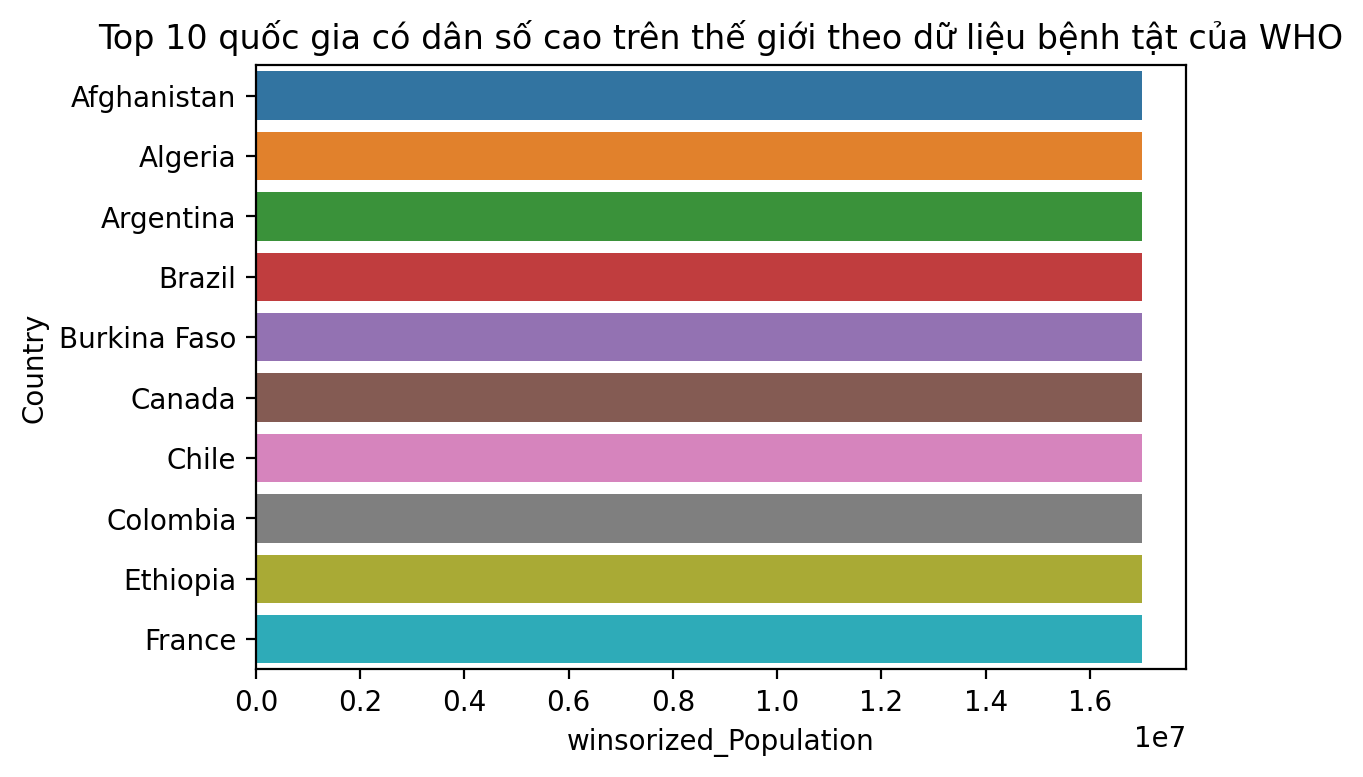

In [86]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Population_point_top.head(10),y='Country',x='winsorized_Population')
plt.title("Top 10 quốc gia có dân số cao trên thế giới theo dữ liệu bệnh tật của WHO")

# Top 10 quốc gia có những người ốm từ 1 đến 19 tuổi cao nhất thế giới

In [87]:
thinness_1to19_years_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_thinness_1to19_years']]

In [88]:
thinness_1to19_years_point  = thinness_1to19_years_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [89]:
thinness_1to19_years_point['row_number'] = thinness_1to19_years_point.groupby('Country').cumcount()+1
thinness_1to19_years_point_top = thinness_1to19_years_point[thinness_1to19_years_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_thinness_1to19_years') 

In [90]:
thinness_1to19_years_point_top = thinness_1to19_years_point[thinness_1to19_years_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_thinness_1to19_years') 

In [91]:
thinness_1to19_years_point_top

,Country,Status,winsorized_thinness_1to19_years
0,Afghanistan,Developing,15.7
137,Bangladesh,Developing,15.7
212,Bhutan,Developing,15.7
824,India,Developing,15.7
1304,Nepal,Developing,15.7
1379,Pakistan,Developing,15.7
1679,Sri Lanka,Developing,15.2
1124,Maldives,Developing,13.6
1274,Myanmar,Developing,12.9
1349,Niger,Developing,9.8


Text(0.5, 1.0, 'Top 10 quốc gia có những người ốm từ 1 đến 19 tuổi cao nhất thế giới')

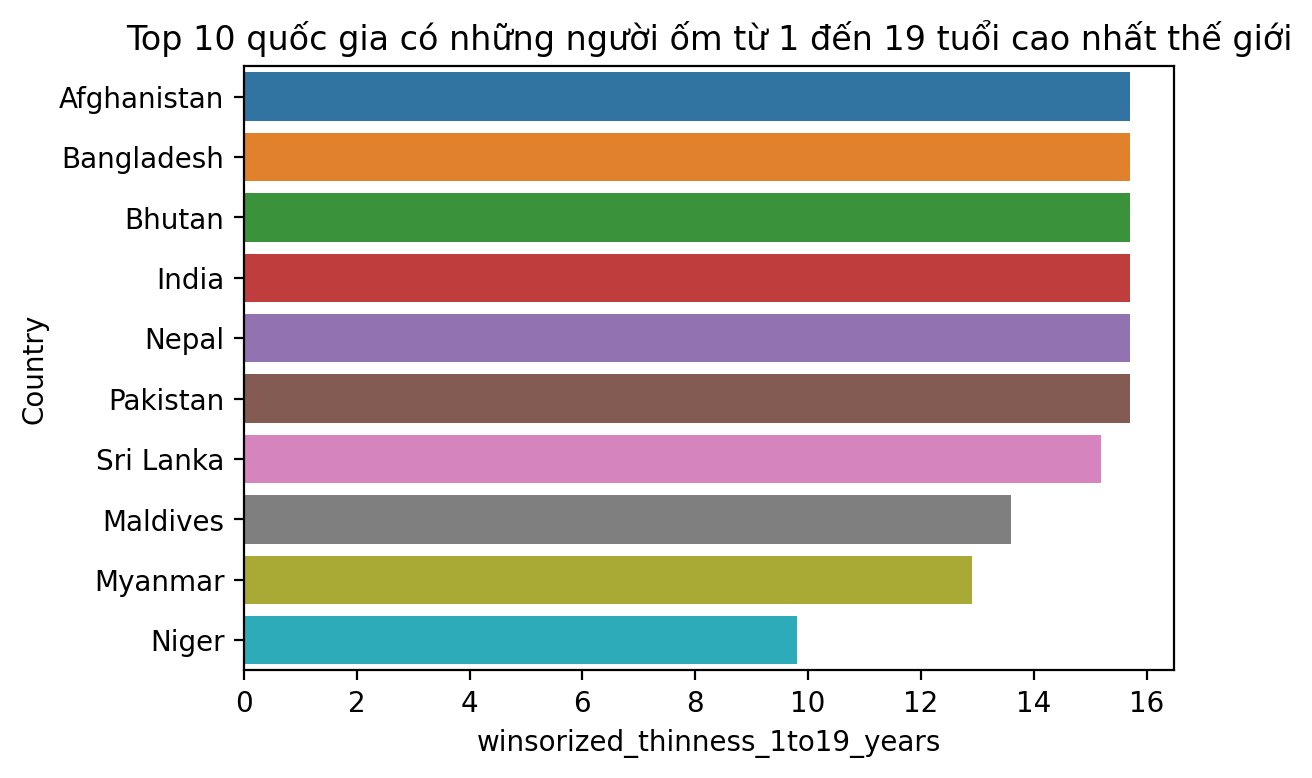

In [92]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=thinness_1to19_years_point_top.head(10),y='Country',x='winsorized_thinness_1to19_years')
plt.title("Top 10 quốc gia có những người ốm từ 1 đến 19 tuổi cao nhất thế giới")

# Top 10 quốc gia có những người ốm từ 5 đến 9 tuổi cao nhất thế giới

In [93]:
thinness_5to9_years_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_thinness_5to9_years']]

In [94]:
thinness_5to9_years_point  = thinness_5to9_years_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [95]:
thinness_5to9_years_point['row_number'] = thinness_5to9_years_point.groupby('Country').cumcount()+1
thinness_5to9_years_point_top = thinness_5to9_years_point[thinness_5to9_years_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_thinness_5to9_years') 

In [96]:
thinness_5to9_years_point_top = thinness_5to9_years_point[thinness_5to9_years_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_thinness_5to9_years') 

In [97]:
thinness_1to19_years_point_top

,Country,Status,winsorized_thinness_1to19_years
0,Afghanistan,Developing,15.7
137,Bangladesh,Developing,15.7
212,Bhutan,Developing,15.7
824,India,Developing,15.7
1304,Nepal,Developing,15.7
1379,Pakistan,Developing,15.7
1679,Sri Lanka,Developing,15.2
1124,Maldives,Developing,13.6
1274,Myanmar,Developing,12.9
1349,Niger,Developing,9.8


Text(0.5, 1.0, 'Top 10 quốc gia có những người ốm từ 5 đến 9 tuổi cao nhất thế giới')

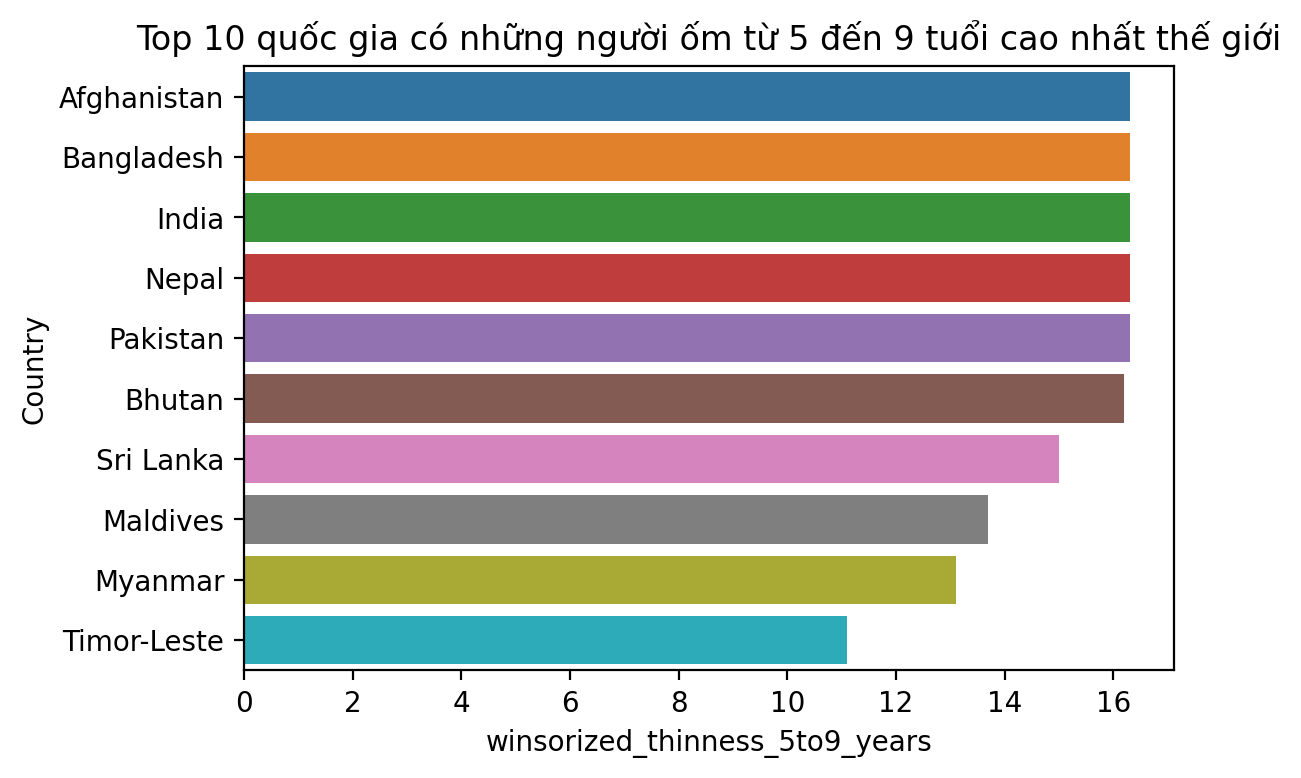

In [98]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=thinness_5to9_years_point_top.head(10),y='Country',x='winsorized_thinness_5to9_years')
plt.title("Top 10 quốc gia có những người ốm từ 5 đến 9 tuổi cao nhất thế giới")

# Top 10 quốc gia có tổng thu nhập tài nguyên nhiều nhất thế giới

In [99]:
Income_Comp_Of_Resources_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Income_Comp_Of_Resources']]

In [100]:
Income_Comp_Of_Resources_point  = Income_Comp_Of_Resources_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [101]:
Income_Comp_Of_Resources_point['row_number'] = Income_Comp_Of_Resources_point.groupby('Country').cumcount()+1
Income_Comp_Of_Resources_point_top = Income_Comp_Of_Resources_point[Income_Comp_Of_Resources_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Income_Comp_Of_Resources') 

In [102]:
Income_Comp_Of_Resources_point_top = Income_Comp_Of_Resources_point[Income_Comp_Of_Resources_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Income_Comp_Of_Resources') 

In [103]:
Income_Comp_Of_Resources_point_top

,Country,Status,winsorized_Income_Comp_Of_Resources
92,Australia,Developed,0.936
1319,Netherlands,Developed,0.923
689,Germany,Developed,0.920
362,Canada,Developing,0.912
869,Ireland,Developed,0.910
1724,Sweden,Developed,0.906
884,Israel,Developing,0.895
107,Austria,Developed,0.892
1064,Luxembourg,Developed,0.892
167,Belgium,Developed,0.890


Text(0.5, 1.0, 'Top 10 quốc gia có tổng thu nhập tài nguyên nhiều nhất thế giới')

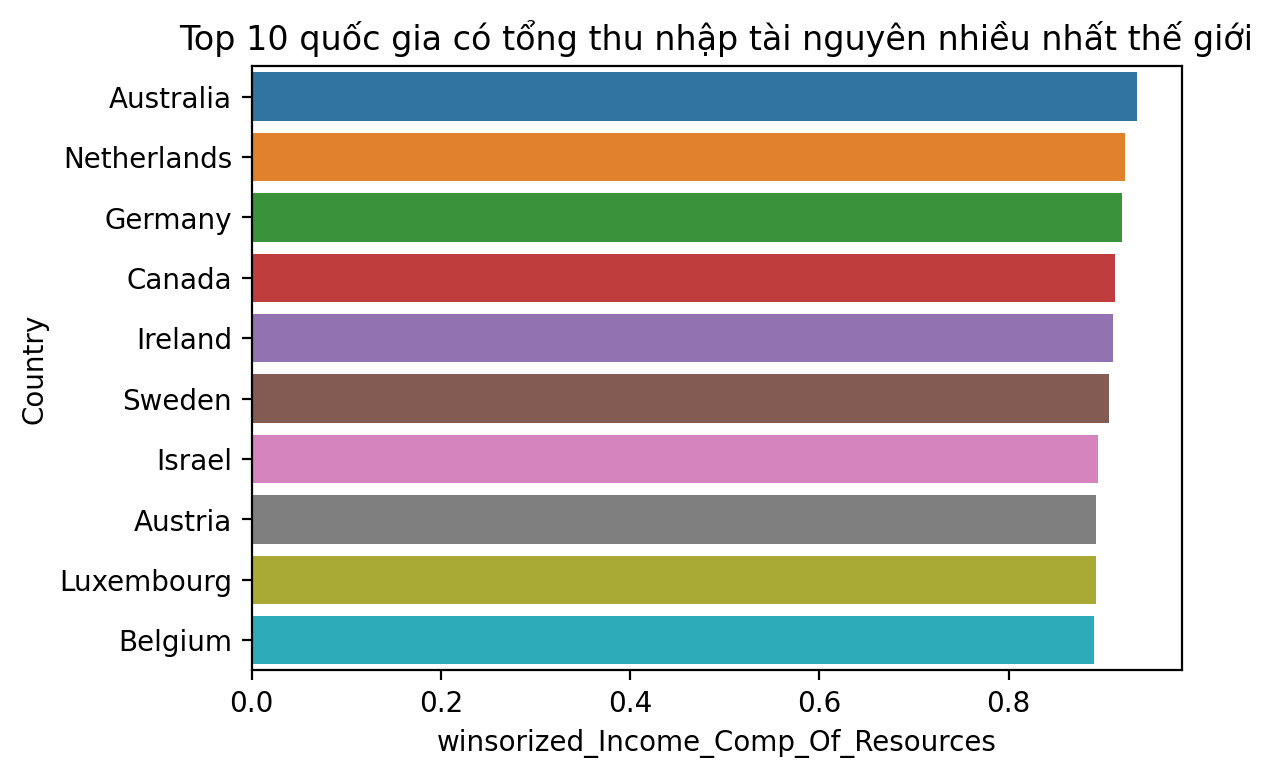

In [104]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Income_Comp_Of_Resources_point_top.head(10),y='Country',x='winsorized_Income_Comp_Of_Resources')
plt.title("Top 10 quốc gia có tổng thu nhập tài nguyên nhiều nhất thế giới")

# Top 10 quốc gia có số lượng người đang đi học nhiều nhất thế giới

In [105]:
Schooling_point= df_WHO_clean_data[['Country', 'Status', 'winsorized_Schooling']]

In [106]:
Schooling_point  = Schooling_point.sort_values(['Country', 'Status'], ascending=[True, False])

In [107]:
Schooling_point['row_number'] = Schooling_point.groupby('Country').cumcount()+1
Schooling_point_top = Schooling_point[Schooling_point['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'winsorized_Schooling') 

In [108]:
Schooling_point_top = Schooling_point[Schooling_point['row_number']==1].drop('row_number',axis=1).nlargest(10, 'winsorized_Schooling') 

In [109]:
Schooling_point_top

,Country,Status,winsorized_Schooling
92,Australia,Developed,18.6
869,Ireland,Developed,18.6
1319,Netherlands,Developed,18.1
1664,Spain,Developed,17.6
62,Argentina,Developing,17.3
719,Greece,Developing,17.2
689,Germany,Developed,17.0
1484,Portugal,Developed,16.8
599,Estonia,Developing,16.5
1049,Lithuania,Developed,16.5


Text(0.5, 1.0, 'Top 10 quốc gia có số lượng người đang đi học nhiều nhất thế giới')

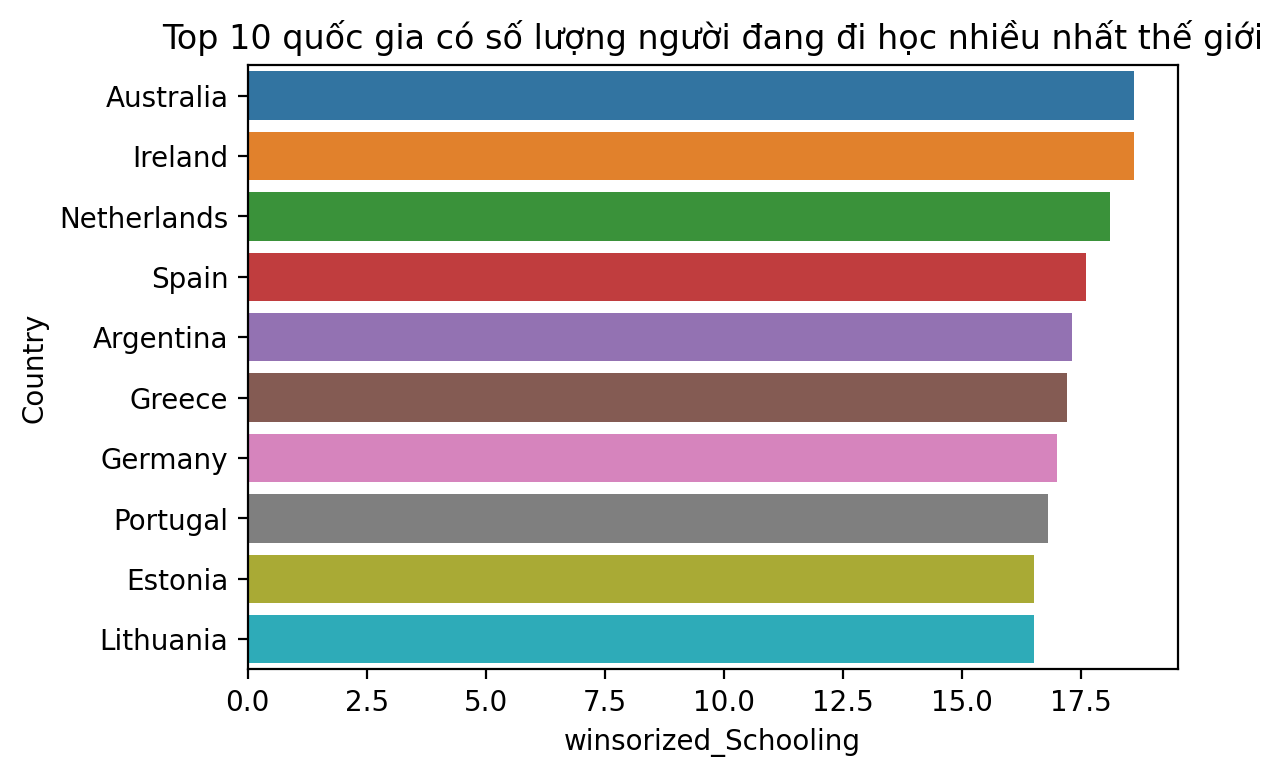

In [110]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=Schooling_point_top.head(10),y='Country',x='winsorized_Schooling')
plt.title("Top 10 quốc gia có số lượng người đang đi học nhiều nhất thế giới")

# Tổng hợp bảng

In [111]:
list_cs = ('winsorized_Life_Expectancy',
           'winsorized_Alcohol',
           'winsorized_Percentage_Exp',
           'winsorized_HepatitisB',
           'winsorized_Under_Five_Deaths',
           'winsorized_Polio',
           'winsorized_Tot_Exp',
           'winsorized_Diphtheria',
           'winsorized_HIV',
           'winsorized_GDP',
           'winsorized_Population',
           'winsorized_thinness_1to19_years',
           'winsorized_thinness_5to9_years',
           'winsorized_Income_Comp_Of_Resources',
           'winsorized_Schooling')
d1  = {'winsorized_Life_Expectancy':"Top 10 quốc gia có tuổi thọ cao nhất",
       'winsorized_Adult_Mortality':"Top 10 quốc gia có lượng người trưởng thành tử vong lớn",
       'winsorized_Infant_Deaths':"Top 10 quốc gia có lượng trẻ tử vong lớn",
       'winsorized_Alcohol':"Top 10 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất",
       'winsorized_Percentage_Exp':"Top 10 quốc gia có Phần trăm kinh nghiệm nhiều nhất",
       'winsorized_HepatitisB':"Top 10 quốc gia có số người mắc bệnh viêm gan B nhiều nhất",
       'winsorized_Under_Five_Deaths':"Top 10 quốc gia có dưới 5 người chết nhiều nhất",
       'winsorized_Polio':"Top 10 quốc gia có số người mắc bệnh bại liệt nhiều nhất",
       'winsorized_Tot_Exp':"Top 10 quốc gia có tổng điểm kinh nghiệm nhiều nhất",
       'winsorized_Diphtheria':"Top 10 quốc gia có số người mắc bệnh bạch hầu nhiều nhất",
       'winsorized_HIV':"Top 10 quốc gia có số người mắc bệnh HIV nhiều nhất",
       'winsorized_GDP':"Top 10 quốc gia có GDP cao nhất thế giới theo dữ liệu bệnh tật của WHO",
       'winsorized_Population':"Top 10 quốc gia có dân số cao trên thế giới theo dữ liệu bệnh tật của WHO",
       'winsorized_thinness_1to19_years':"Top 10 quốc gia có những người ốm từ 1 đến 19 tuổi cao nhất thế giới",
       'winsorized_thinness_5to9_years':"Top 10 quốc gia có những người ốm từ 5 đến 9 tuổi cao nhất thế giới",
       'winsorized_Income_Comp_Of_Resources':"Top 10 quốc gia có tổng thu nhập tài nguyên nhiều nhất thế giới",
       'winsorized_Schooling':"Top 10 quốc gia có số lượng người đang đi học nhiều nhất thế giới"}
# def top_ten(chi_so):
#     df = df_WHO_clean_data[['Country', 'Status',chi_so]]
#     df  = df.sort_values(['Country', 'Status'], ascending=[True, False])
#     df['row_number'] = df.groupby('Country').cumcount()+1
#     df_top = df[df['row_number']==1].drop('row_number',axis=1).nsmallest(10,chi_so) 
#     df_top = df[df['row_number']==1].drop('row_number',axis=1).nlargest(10,chi_so)
#     dfresult = df_top
#     kt = d1[chi_so]
#     plt.figure(figsize=(4,3),dpi=200)
#     fig = sns.barplot(data= dfresult.head(10),y='Country',x=chi_so)
#     plt.title(kt)
#     return fig
        

In [112]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def top_ten2(chi_so):
    df = df_WHO_clean_data[['Country', 'Status',chi_so]]
    df  = df.sort_values(['Country', 'Status'], ascending=[True, False])
    df['row_number'] = df.groupby('Country').cumcount()+1
    df_top = df[df['row_number']==1].drop('row_number',axis=1).nsmallest(10,chi_so) 
    df_top = df[df['row_number']==1].drop('row_number',axis=1).nlargest(10,chi_so)
    dfresult = df_top
    kt = str.upper(d1[chi_so])
    fig = px.bar(dfresult, x=chi_so, y='Country',color='Country',title=kt)
    fig.update_layout(barmode='stack')
    return fig

In [113]:
import ipywidgets as widgets
from IPython.display import display

term = widgets.Dropdown(description='CHỌN TIÊU CHÍ MUỐN XEM',
                           options=list_cs,
                          )
output = widgets.Output(layout={'border': '0px solid black'})
labelLayout = {'border': '1px solid black', 'background':'green',
               'justify_content':'center', 'display':'flex'}
wLabel = widgets.Label(value='TOP 10 quốc gia dựa theo dữ liệu WHO:', layout=labelLayout)
box1 = widgets.VBox([term])
box2 = widgets.VBox([wLabel, output])
box = widgets.VBox([box1, box2])
display(box)

def ThucHien():
    fig = top_ten2('winsorized_Life_Expectancy')
    with output:
        output.clear_output()
        fig.show()
ThucHien()
def ThucHien2(chi_so):
    wLabel.value = 'Top 10 quốc gia dựa theo dữ liệu WHO: ' + chi_so
    fig = top_ten2(chi_so)
    with output:
        output.clear_output()
        fig.show()
b = widgets.interactive(ThucHien2, chi_so=term)

In [114]:
Point = df_WHO_clean_data[['Country', 'Year','Status','winsorized_Life_Expectancy','winsorized_Adult_Mortality', 'winsorized_Infant_Deaths',
'winsorized_Alcohol','winsorized_Percentage_Exp','winsorized_HepatitisB',
'winsorized_Under_Five_Deaths','winsorized_Polio','winsorized_Tot_Exp','winsorized_Diphtheria',
'winsorized_HIV','winsorized_GDP','winsorized_Population','winsorized_thinness_1to19_years'
,'winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources','winsorized_Schooling']]

def top_ten_line(chi_so):
    d1  = {'winsorized_Life_Expectancy':"Top 10 quốc gia có tuổi thọ cao nhất",
       'winsorized_Adult_Mortality':"Top 10 quốc gia có lượng người trưởng thành tử vong lớn",
       'winsorized_Infant_Deaths':"Top 10 quốc gia có lượng trẻ tử vong lớn",
       'winsorized_Alcohol':"Top 10 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất",
       'winsorized_Percentage_Exp':"Top 10 quốc gia có Phần trăm kinh nghiệm nhiều nhất",
       'winsorized_HepatitisB':"Top 10 quốc gia có số người mắc bệnh viêm gan B nhiều nhất",
       'winsorized_Under_Five_Deaths':"Top 10 quốc gia có dưới 5 người chết nhiều nhất",
       'winsorized_Polio':"Top 10 quốc gia có số người mắc bệnh bại liệt nhiều nhất",
       'winsorized_Tot_Exp':"Top 10 quốc gia có tổng điểm kinh nghiệm nhiều nhất",
       'winsorized_Diphtheria':"Top 10 quốc gia có số người mắc bệnh bạch hầu nhiều nhất",
       'winsorized_HIV':"Top 10 quốc gia có số người mắc bệnh HIV nhiều nhất",
       'winsorized_GDP':"Top 10 quốc gia có GDP cao nhất thế giới theo dữ liệu bệnh tật của WHO",
       'winsorized_Population':"Top 10 quốc gia có dân số cao trên thế giới theo dữ liệu bệnh tật của WHO",
       'winsorized_thinness_1to19_years':"Top 10 quốc gia có những người ốm từ 1 đến 19 tuổi cao nhất thế giới",
       'winsorized_thinness_5to9_years':"Top 10 quốc gia có những người ốm từ 5 đến 9 tuổi cao nhất thế giới",
       'winsorized_Income_Comp_Of_Resources':"Top 10 quốc gia có tổng thu nhập tài nguyên nhiều nhất thế giới",
       'winsorized_Schooling':"Top 10 quốc gia có số lượng người đang đi học nhiều nhất thế giới"}
    df = df_WHO_clean_data[['Country', 'Status',chi_so]]
    df  = df.sort_values(['Country', 'Status'], ascending=[True, False])
    df['row_number'] = df.groupby('Country').cumcount()+1
    df_top = df[df['row_number']==1].drop('row_number',axis=1).nsmallest(10,chi_so) 
    df_top = df[df['row_number']==1].drop('row_number',axis=1).nlargest(10,chi_so)
    dr_draft = pd.DataFrame(df_top[['Country']])
    list_draft = dr_draft['Country'].values.tolist()
    kt = str.upper(d1[chi_so])
#     fig, axes = plt.subplots(1,1, figsize=(20, 6))
    d0x = Point[Point['Country']==list_draft[0]]
    d1x = Point[Point['Country']==list_draft[1]]
    d2x = Point[Point['Country']==list_draft[2]]
    d3x = Point[Point['Country']==list_draft[3]]
    d4x = Point[Point['Country']==list_draft[4]]
    d5x = Point[Point['Country']==list_draft[5]]
    d6x = Point[Point['Country']==list_draft[6]]
    d7x = Point[Point['Country']==list_draft[7]]
    d8x = Point[Point['Country']==list_draft[8]]
    d9x = Point[Point['Country']==list_draft[9]]
    df_concat = pd.concat([d0x,d1x,d2x,d3x,d4x,d5x,d6x,d7x,d8x,d9x], axis=0)
    fig = px.line(df_concat, x='Year', y=chi_so, color='Country',title=kt)
    return fig

In [115]:
import ipywidgets as widgets
from IPython.display import display

term = widgets.Dropdown(description='CHỌN TIÊU CHÍ MUỐN XEM',
                           options=list_cs,
                          )
output2 = widgets.Output(layout={'border': '0px solid green'})
labelLayout = {'border': '1px solid black', 'background':'green',
               'justify_content':'center', 'display':'flex'}
wLabel2 = widgets.Label(value='Top 10 quốc gia dựa theo dữ liệu WHO:', layout=labelLayout)
box1a = widgets.VBox([term])
box2a = widgets.VBox([wLabel2, output2])
box = widgets.VBox([box1a, box2a])
display(box)

def ThucHien_a():
    fig2 = top_ten_line('winsorized_Life_Expectancy')
    with output2:
        output2.clear_output()
        fig2.show()
ThucHien_a()
def ThucHien2_a(chi_so):
    wLabel2.value = 'TOP 10 quốc gia dựa theo dữ liệu WHO qua các năm: ' + chi_so
    fig2 = top_ten_line(chi_so)
    with output2:
        output2.clear_output()
        fig2.show()
c = widgets.interactive(ThucHien2_a, chi_so=term)

# Top 5 quốc gia có tuổi thọ cao nhất qua các năm

Text(0.5, 1.0, 'Khác biệt giữa các nước đang và đã phát triển về tuổi thọ')

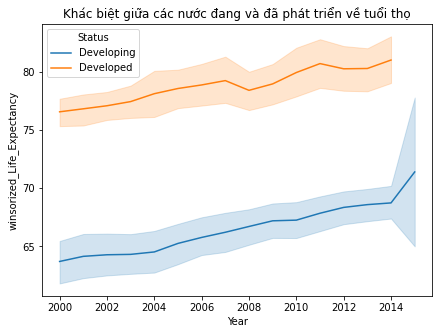

In [116]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_WHO_clean_data,y='winsorized_Life_Expectancy',x='Year',hue='Status')
plt.title("Khác biệt giữa các nước đang và đã phát triển về tuổi thọ")


In [117]:
Point = df_WHO_clean_data[['Country', 'Status','winsorized_Life_Expectancy','Year',
'winsorized_Adult_Mortality', 'winsorized_Infant_Deaths',
'winsorized_Alcohol','winsorized_Percentage_Exp','winsorized_HepatitisB',
'winsorized_Under_Five_Deaths','winsorized_Polio','winsorized_Tot_Exp','winsorized_Diphtheria',
'winsorized_HIV','winsorized_GDP','winsorized_Population','winsorized_thinness_1to19_years'
,'winsorized_thinness_5to9_years','winsorized_Income_Comp_Of_Resources','winsorized_Schooling']]

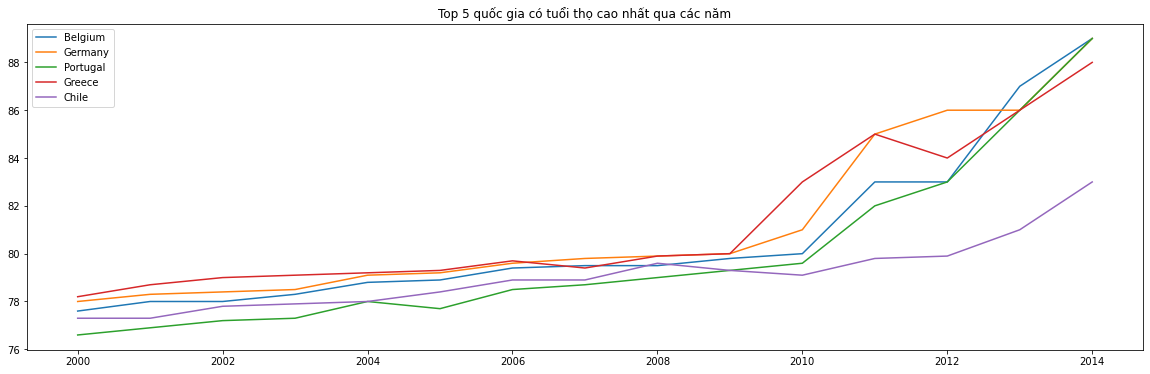

In [118]:
fig, axes = plt.subplots(1,1, figsize=(20, 6))
Bel_Life_Expantancy = Point[Point['Country']=='Belgium']
Ger_Life_Expantancy = Point[Point['Country']=='Germany']
Por_Life_Expantancy = Point[Point['Country']=='Portugal']
Gre_Life_Expantancy = Point[Point['Country']=='Greece']
Chi_Life_Expantancy = Point[Point['Country']=='Chile']
# Cyp_Life_Expantancy = Point[Point['Country']=='Cyprus']
# Aus_Life_Expantancy = Point[Point['Country']=='Australia']
# Spa_Life_Expantancy = Point[Point['Country']=='Spain']
# Ita_Life_Expantancy = Point[Point['Country']=='Italy']
# Swe_Life_Expantancy = Point[Point['Country']=='Sweden']
ax = sns.lineplot(data = Bel_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Belgium', palette= 'bright')
ax = sns.lineplot(data = Ger_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Germany', palette= 'bright' )
ax = sns.lineplot(data = Por_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Portugal', palette= 'bright' )
ax = sns.lineplot(data = Gre_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Greece', palette= 'bright' )
ax = sns.lineplot(data = Chi_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Chile', palette= 'bright' )
# ax = sns.lineplot(data = Cyp_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Cyprus', palette= 'bright' )
# ax = sns.lineplot(data = Aus_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Australia', palette= 'bright' )
# ax = sns.lineplot(data = Spa_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Spain', palette= 'bright' )
# ax = sns.lineplot(data = Ita_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Italy', palette= 'bright' )
# ax = sns.lineplot(data = Ita_Life_Expantancy, x = 'Year', y = 'winsorized_Life_Expectancy', label = 'Sweden', palette= 'bright' )
ax.set_ylim(ax.get_ylim()[::1])
ax.set(ylabel = '', xlabel = '', title = 'Top 5 quốc gia có tuổi thọ cao nhất qua các năm')
plt.show()

# Top 5 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất qua các năm

Text(0.5, 1.0, 'Khác biệt giữa các nước đang và đã phát triển mắc bệnh liên quan nồng độ cồn')

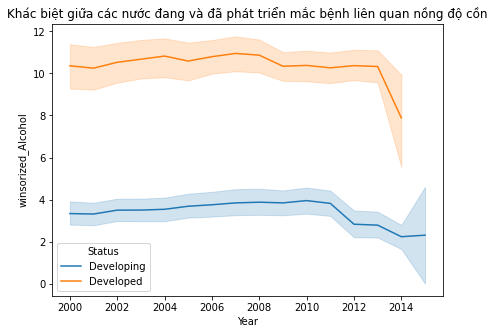

In [119]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_WHO_clean_data,x='Year',y='winsorized_Alcohol',hue='Status')
plt.title("Khác biệt giữa các nước đang và đã phát triển mắc bệnh liên quan nồng độ cồn")

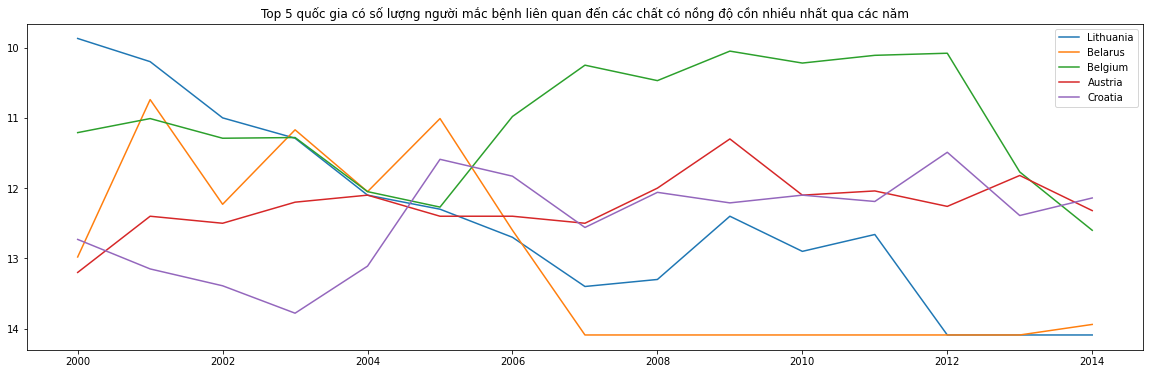

In [120]:
fig, axes = plt.subplots(1,1, figsize=(20, 6))
Lit_Alcohol = Point[Point['Country']=='Lithuania']
Bela_Alcohol = Point[Point['Country']=='Belarus']
Bel_Alcohol = Point[Point['Country']=='Belgium']
Aus_Alcohol = Point[Point['Country']=='Austria']
Cra_Alcohol = Point[Point['Country']=='Croatia']
ax = sns.lineplot(data = Lit_Alcohol, x = 'Year', y = 'winsorized_Alcohol', label = 'Lithuania', palette= 'bright')
ax = sns.lineplot(data = Bela_Alcohol, x = 'Year', y = 'winsorized_Alcohol', label = 'Belarus', palette= 'bright' )
ax = sns.lineplot(data = Bel_Alcohol, x = 'Year', y = 'winsorized_Alcohol', label = 'Belgium', palette= 'bright' )
ax = sns.lineplot(data = Aus_Alcohol, x = 'Year', y = 'winsorized_Alcohol', label = 'Austria', palette= 'bright' )
ax = sns.lineplot(data = Cra_Alcohol, x = 'Year', y = 'winsorized_Alcohol', label = 'Croatia', palette= 'bright' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'Top 5 quốc gia có số lượng người mắc bệnh liên quan đến các chất có nồng độ cồn nhiều nhất qua các năm')
plt.show()

# Top 5 quốc gia có số người mắc bệnh viêm gan B nhiều nhất qua các năm

Text(0.5, 1.0, 'Khác biệt giữa các nước đang và đã phát triển mắc bệnh viêm gan B')

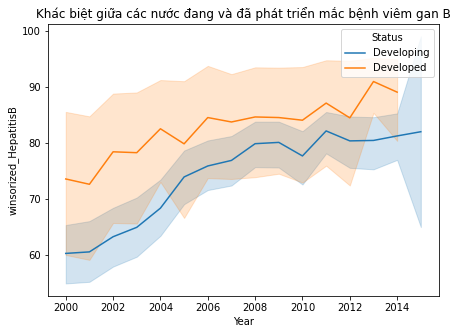

In [121]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_WHO_clean_data,y='winsorized_HepatitisB',x='Year',hue='Status')
plt.title("Khác biệt giữa các nước đang và đã phát triển mắc bệnh viêm gan B")

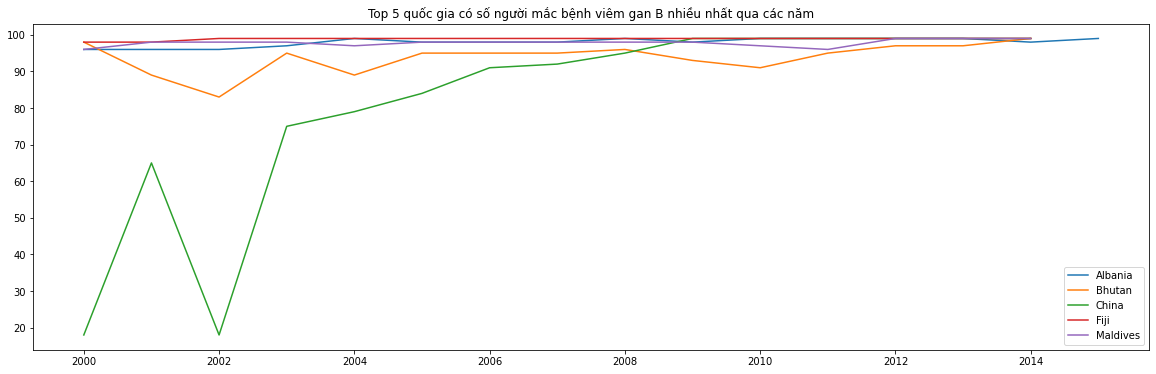

In [122]:
fig, axes = plt.subplots(1,1, figsize=(20, 6))
Alb_HepatitisB = Point[Point['Country']=='Albania']
Bhu_HepatitisB = Point[Point['Country']=='Bhutan']
Chi_HepatitisB = Point[Point['Country']=='China']
Fiji_HepatitisB = Point[Point['Country']=='Fiji']
Mal_HepatitisB = Point[Point['Country']=='Maldives']
ax = sns.lineplot(data = Alb_HepatitisB, x = 'Year', y = 'winsorized_HepatitisB', label = 'Albania', palette= 'bright')
ax = sns.lineplot(data = Bhu_HepatitisB, x = 'Year', y = 'winsorized_HepatitisB', label = 'Bhutan', palette= 'bright' )
ax = sns.lineplot(data = Chi_HepatitisB, x = 'Year', y = 'winsorized_HepatitisB', label = 'China', palette= 'bright' )
ax = sns.lineplot(data = Fiji_HepatitisB, x = 'Year', y = 'winsorized_HepatitisB', label = 'Fiji', palette= 'bright' )
ax = sns.lineplot(data = Mal_HepatitisB, x = 'Year', y = 'winsorized_HepatitisB', label = 'Maldives', palette= 'bright' )
ax.set_ylim(ax.get_ylim()[::1])
ax.set(ylabel = '', xlabel = '', title = 'Top 5 quốc gia có số người mắc bệnh viêm gan B nhiều nhất qua các năm')
plt.show()

# Top 5 quốc gia có số người mắc bệnh bại liệt nhiều nhất qua các năm

Text(0.5, 1.0, 'Khác biệt giữa các nước đang và đã phát triển mắc bệnh bại liệt')

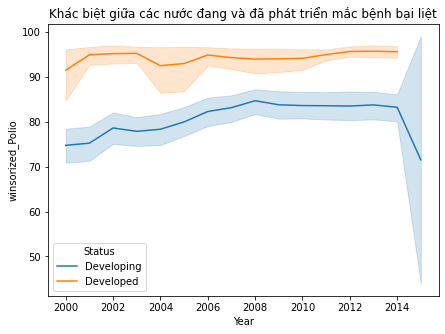

In [123]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_WHO_clean_data,y='winsorized_Polio',x='Year',hue='Status')
plt.title("Khác biệt giữa các nước đang và đã phát triển mắc bệnh bại liệt")

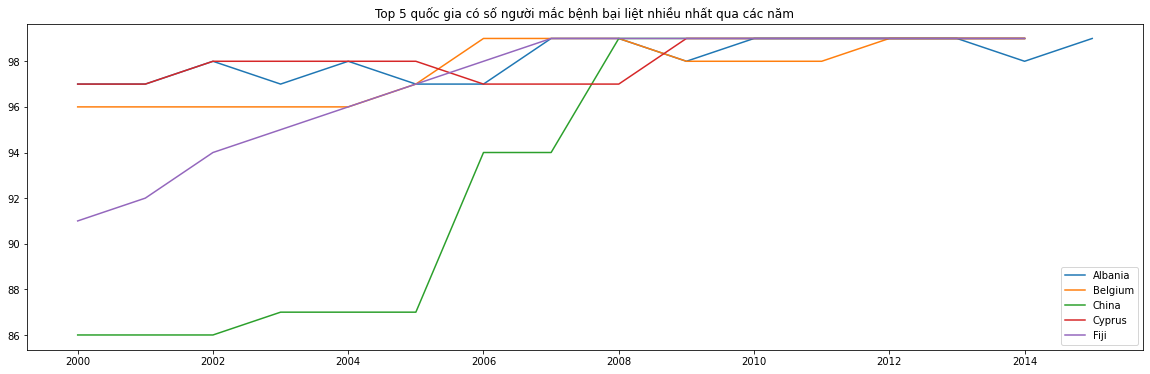

In [124]:
fig, axes = plt.subplots(1,1, figsize=(20, 6))
Alb_Polio = Point[Point['Country']=='Albania']
Bel_Polio = Point[Point['Country']=='Belgium']
Chi_Polio = Point[Point['Country']=='China']
Cyp_Polio = Point[Point['Country']=='Cyprus']
Fiji_Polio = Point[Point['Country']=='Fiji']
ax = sns.lineplot(data = Alb_Polio, x = 'Year', y = 'winsorized_Polio', label = 'Albania', palette= 'bright')
ax = sns.lineplot(data = Bel_Polio, x = 'Year', y = 'winsorized_Polio', label = 'Belgium', palette= 'bright' )
ax = sns.lineplot(data = Chi_Polio, x = 'Year', y = 'winsorized_Polio', label = 'China', palette= 'bright' )
ax = sns.lineplot(data = Cyp_Polio, x = 'Year', y = 'winsorized_Polio', label = 'Cyprus', palette= 'bright' )
ax = sns.lineplot(data = Fiji_Polio, x = 'Year', y = 'winsorized_Polio', label = 'Fiji', palette= 'bright' )
ax.set_ylim(ax.get_ylim()[::1])
ax.set(ylabel = '', xlabel = '', title = 'Top 5 quốc gia có số người mắc bệnh bại liệt nhiều nhất qua các năm' )
plt.show()

# Top 5 quốc gia có số người mắc bệnh HIV nhiều nhất qua các năm

Text(0.5, 1.0, 'Khác biệt giữa các nước đang và đã phát triển mắc bệnh HIV')

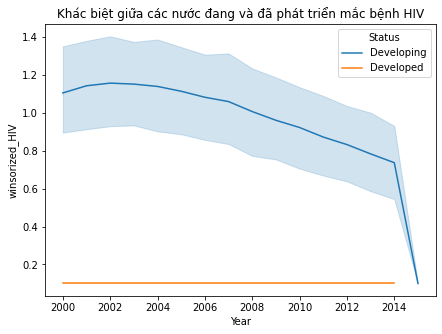

In [125]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_WHO_clean_data,y='winsorized_HIV',x='Year',hue='Status')
plt.title("Khác biệt giữa các nước đang và đã phát triển mắc bệnh HIV")

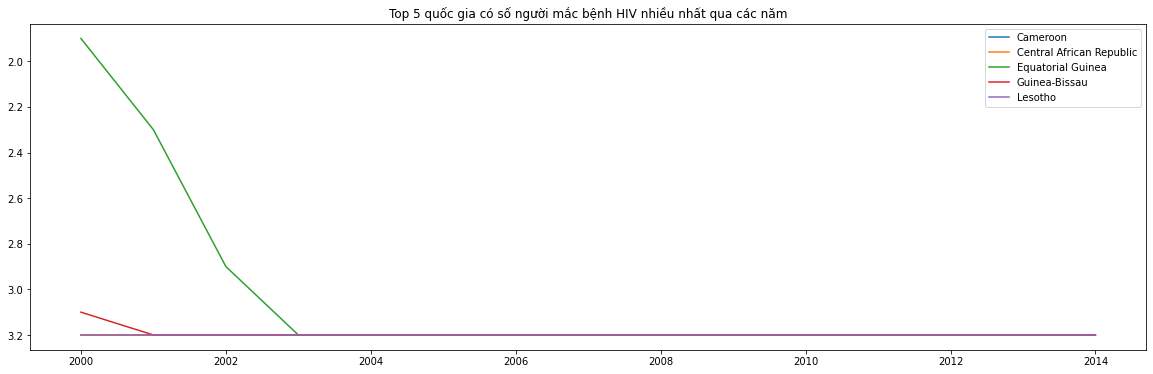

In [126]:
fig, axes = plt.subplots(1,1, figsize=(20, 6))
Cam_HIV = Point[Point['Country']=='Cameroon']
CAR_HIV = Point[Point['Country']=='Central African Republic']
EG_HIV = Point[Point['Country']=='Equatorial Guinea']
GB_HIV = Point[Point['Country']=='Guinea-Bissau']
Les_HIV = Point[Point['Country']=='Lesotho']
ax = sns.lineplot(data = Cam_HIV, x = 'Year', y = 'winsorized_HIV', label = 'Cameroon', palette= 'bright')
ax = sns.lineplot(data = CAR_HIV, x = 'Year', y = 'winsorized_HIV', label = 'Central African Republic', palette= 'bright' )
ax = sns.lineplot(data = EG_HIV, x = 'Year', y = 'winsorized_HIV', label = 'Equatorial Guinea', palette= 'bright' )
ax = sns.lineplot(data = GB_HIV, x = 'Year', y = 'winsorized_HIV', label = 'Guinea-Bissau', palette= 'bright' )
ax = sns.lineplot(data = Les_HIV, x = 'Year', y = 'winsorized_HIV', label = 'Lesotho', palette= 'bright' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'Top 5 quốc gia có số người mắc bệnh HIV nhiều nhất qua các năm')
plt.show()

In [127]:
import plotly.graph_objects as go


categories = ['Alcohol', 'Hepatitis B', 'Polio', 'Diphtheria', 'HIV']
categories = [*categories, categories[0]]

r_Developing = [5876.615,125452,137949,138444,1708.3]
r_Developed = [2952.750,23528,26888,26926,28.5]
r_Developing = [*r_Developing, r_Developing[0]]
r_Developed = [*r_Developed, r_Developed[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=r_Developing, theta=categories, fill='toself', name='Developing country'),
        go.Scatterpolar(r=r_Developed, theta=categories, fill='toself', name='Developed country'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Country comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show()

# Thống kê suy diễn

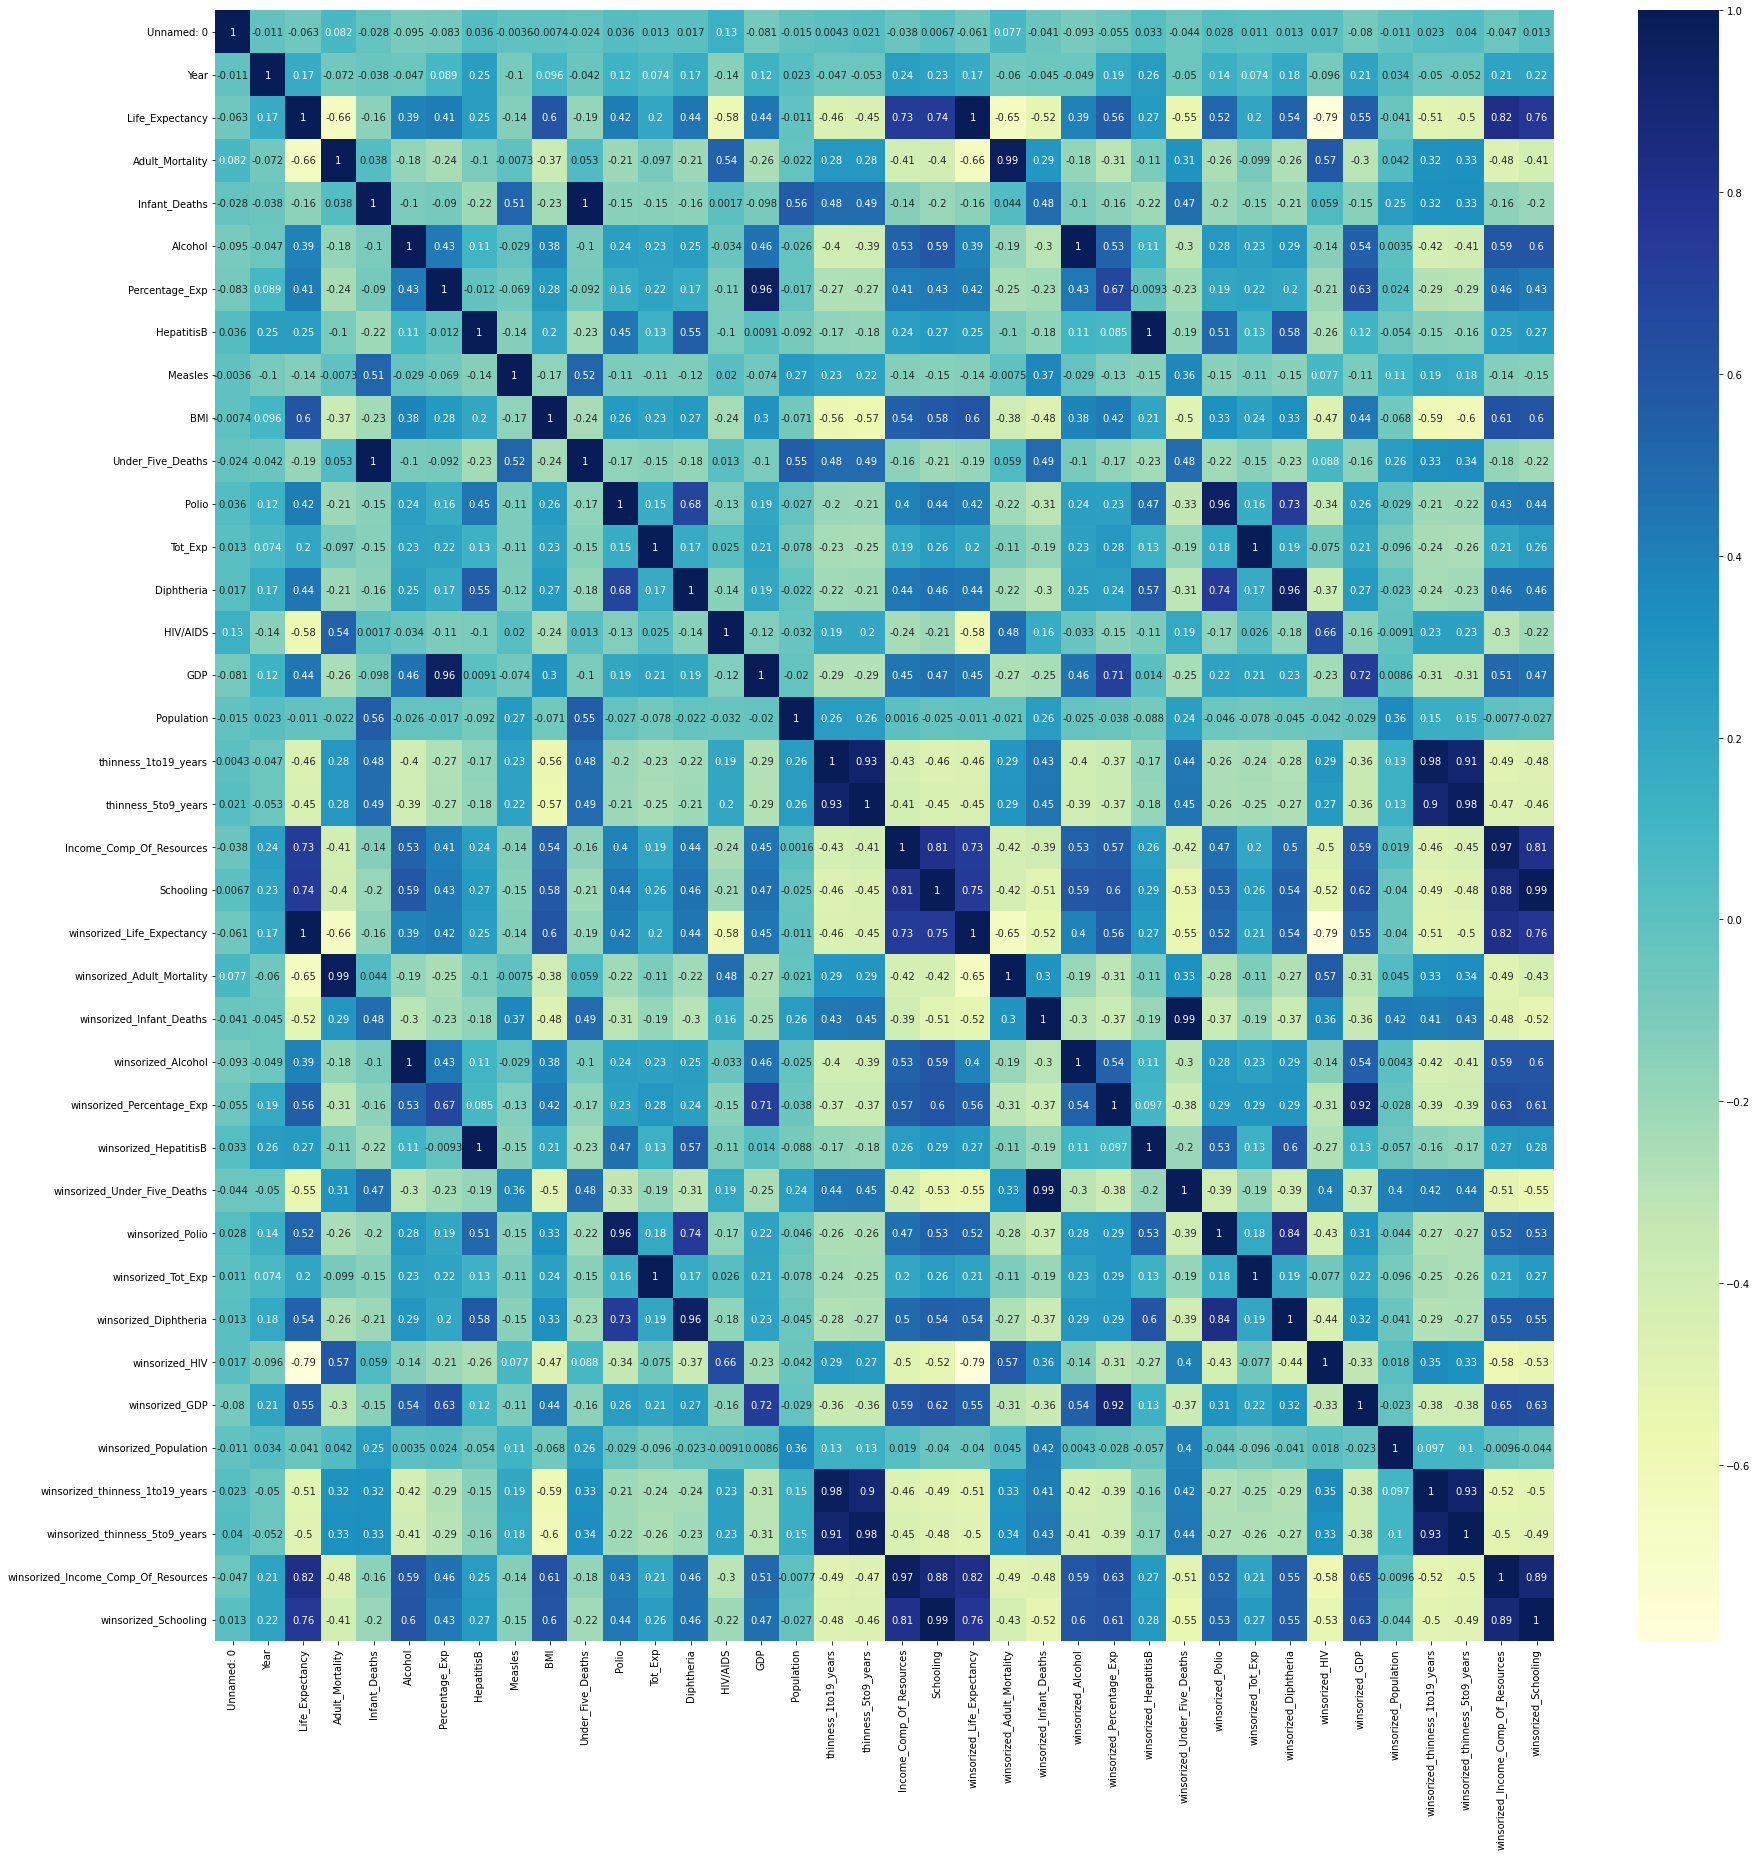

In [128]:
plt.figure(figsize=(30,30)) 
dataplot = sns.heatmap(df_WHO_clean_data.corr(), cmap="YlGnBu", annot=True)
plt.savefig('plot1.eps')
plt.show()

In [129]:
list_cols = df_WHO_clean_data.corr()["winsorized_Life_Expectancy"].abs().sort_values(ascending=False)[1:]
column_name = ""
for col in list_cols.index:
    column_name += col + ","
    print(col)
names = column_name[0:len(column_name)-1].split(",")

Life_Expectancy
winsorized_Income_Comp_Of_Resources
winsorized_HIV
winsorized_Schooling
Schooling
Income_Comp_Of_Resources
Adult_Mortality
winsorized_Adult_Mortality
BMI
HIV/AIDS
winsorized_Percentage_Exp
winsorized_Under_Five_Deaths
winsorized_GDP
winsorized_Diphtheria
winsorized_Infant_Deaths
winsorized_Polio
winsorized_thinness_1to19_years
winsorized_thinness_5to9_years
thinness_1to19_years
thinness_5to9_years
GDP
Diphtheria
Polio
Percentage_Exp
winsorized_Alcohol
Alcohol
winsorized_HepatitisB
HepatitisB
winsorized_Tot_Exp
Tot_Exp
Under_Five_Deaths
Year
Infant_Deaths
Measles
Unnamed: 0
winsorized_Population
Population


In [130]:
df_WHO_clean_data.corr()["winsorized_Life_Expectancy"].abs().sort_values(ascending=False)[1:]

Life_Expectancy                        0.999564
winsorized_Income_Comp_Of_Resources    0.823222
winsorized_HIV                         0.793696
winsorized_Schooling                   0.762333
Schooling                              0.746461
Income_Comp_Of_Resources               0.728270
Adult_Mortality                        0.659030
winsorized_Adult_Mortality             0.654255
BMI                                    0.601434
HIV/AIDS                               0.577316
winsorized_Percentage_Exp              0.557117
winsorized_Under_Five_Deaths           0.552035
winsorized_GDP                         0.551722
winsorized_Diphtheria                  0.535687
winsorized_Infant_Deaths               0.516494
winsorized_Polio                       0.516167
winsorized_thinness_1to19_years        0.507870
winsorized_thinness_5to9_years         0.498791
thinness_1to19_years                   0.460880
thinness_5to9_years                    0.452230
GDP                                    0

In [131]:
import statsmodels.api as sm
import pandas as pd

# reading data from the csv

rsquare = []
# defining the variables
for i in range(len(names)):
    x = df_WHO_clean_data[names[0:i]]
    y = df_WHO_clean_data["winsorized_Life_Expectancy"]

    # adding the constant term
    x = sm.add_constant(x)

    # performing the regression
    # and fitting the model
    result = sm.OLS(y, x).fit()

# printing the summary table
    print(result.rsquared)
    rsquare.append([i+1,result.rsquared])

0.0
0.9991285919967534
0.9991387949592727
0.999159161295046
0.9991617302491513
0.999161921203414
0.9991619769134589
0.9991637546660225
0.9991996263123528
0.9992007593732073
0.9992372629257371
0.999239935266286
0.9992399353148325
0.9992407818318569
0.9992409339189414
0.9992597792747739
0.9992598012715993
0.9992606411074862
0.9992606411659554
0.9992606562694274
0.9992606965903285
0.999260894035371
0.9992628556201517
0.9992629328082432
0.9992629338416392
0.9992632923850907
0.9992639341771942
0.9992643896668114
0.9992643981791426
0.9992767660115466
0.9992990561224712
0.9992992356613482
0.9993001226343197
0.9993017020026664
0.9993021949021713
0.9993042084927753
0.9993058579918838


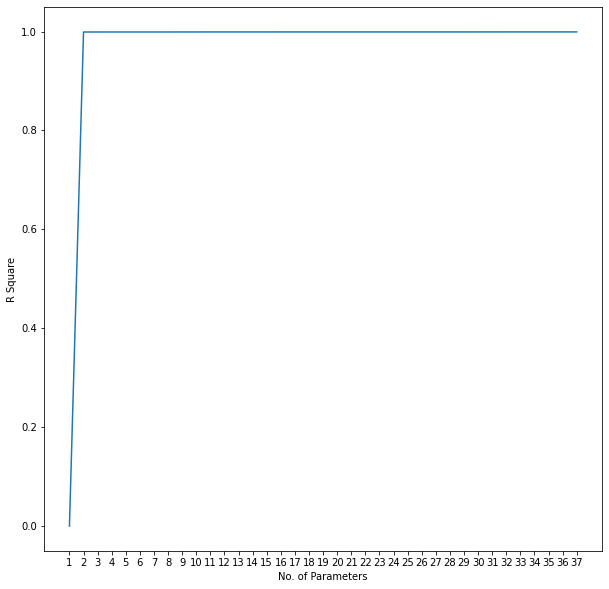

In [132]:
import numpy as np
x, y =  np.array(rsquare).T
plt.figure(figsize=(10,10)) 
plt.xlabel("No. of Parameters")
plt.ylabel("R Square")
plt.xticks(x)
plt.plot(x,y)
plt.savefig("plot2.eps")
plt.show()

# Hồi quy đa biến

In [133]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# reading data from the csv


# defining the variables
x = df_WHO_clean_data[names[0:3]]
y = df_WHO_clean_data["winsorized_Life_Expectancy"]

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
print(result.summary())
print(result.params.abs().sort_values(ascending=False))

# now generate predictions
ypred = result.predict(x)

# calc rmse
rm = rmse(y, ypred)
print(rm)

                                OLS Regression Results                                
Dep. Variable:     winsorized_Life_Expectancy   R-squared:                       0.999
Model:                                    OLS   Adj. R-squared:                  0.999
Method:                         Least Squares   F-statistic:                 7.855e+05
Date:                        Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                                09:48:28   Log-Likelihood:                -289.67
No. Observations:                        1987   AIC:                             587.3
Df Residuals:                            1983   BIC:                             609.7
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------